# Analysis of Air Quality and Temperature in the United States

<b>Group</b>: Benjamin Hu (bh383), Caroline Huang (ch643) 

# Introduction

Following World War II, the United States was met with economic growth, population growth, and rapid suburbanization. These societal shifts lead to the [increase](https://www.epa.gov/transportation-air-pollution-and-climate-change/accomplishments-and-success-air-pollution-transportation) in use of personal vechicles. The use of personal vehicles increased significantly, which, in turn, lead to the rapid increase in air pollutants. Along with the air pollutants from personal vehicles, industrial processes and coal burning in factories and homes significantly increased these air pollutants.

This negligence for the air compromised the health of Americans, especially in urban areas. Severe air pollution can cause asthma, cardiovascular disease, cancer and in some cases, death. For example, in 1948, 20 people were killed and hundreds more were seriously ill due to [severe air pollution](https://oceanservice.noaa.gov/education/tutorial_pollution/02history.html) in Donora, Pennsylvania. Clearly, air pollution is a serious issue.

After analyzing the air quality and temperature over 1980 to 2018, linear regression revealed that for a majority of the states, with each passing month, the average monthly AQI decreases while the average temperature varies for each state. This is interpreted as the effect of implementing the [Clean Air Act](https://www.epa.gov/clean-air-act-overview/clean-air-act-highlights-1990-amendments#:~:text=Specifically%20the%20amendments%20were%20designed,emissions%2C%20and%20stratospheric%20ozone%20depletion.), which has allowed the United States to regulate air pollution, decreasing the gradually AQI over the course of the years. Furthermore, because the graphs of air quality and temperature were seen to be cyclic over the span of the years, another model called the Holt-Winters Model was used to show the trend of the graphs over time and a test train split was used to predict the range of 2014-2019's AQI and temperatures based on the data from 1980-2013. Compared with the linear regression model, the Holt-Winters modeled was revealed to represent the more accurately for both AQI and temperature, with consistently lower mean squared errors, showing these two factors are indeed more cyclic than linear within a period of time since the rate of increase and decrease match a seasonal period. To see a potential significance in using an older range than a more recent one, data from 1980-1999 was used to predict the values of temperature in 2014-2019 as well. Compared with the data from the range of 1980-2013, the two sets of data were neither indistinguishable nor distinguishable, and significance indicated by the p value showed the t-test was insignificant. Therefore, change in temperature over the range might still be significant, but should be retested without the limitations in the amount of data provided. 

### Research Questions

Our research focuses on how air quality and temperature in the United States evolved in recent years. Specifically:<br>
1. In recent years (1980 - 2013), how has the air quality in the United States vary with time? In addition, what are some plausible reasons for trends seen throughout the years? How can we model these changes?
2. In recent years (1980 - 2013), how does the temperature vary with the time? How can we model these changes?

# Data Preparation

### Importing Libraries

In [130]:
## load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
from scipy import stats
from sklearn.linear_model import LinearRegression as lr
from sklearn.model_selection import train_test_split
import seaborn as sns
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')

In [462]:
union_aqi = pd.read_csv('union_aqi.csv')
test_aqi = pd.read_csv('test_aqi.csv')

union_temp = pd.read_csv('union_temp.csv')
test_temp = pd.read_csv('test_temp.csv')
union_temp2 = pd.read_csv('union_temp2.csv')

# Data Description

In the <b>union_aqi</b> and <b>test_aqi</b> dataframe:
- The rows/observations are numbered in sequentially. However, the <b>cbsa</b> is treated as the rows in the research. The [cbsa](https://en.wikipedia.org/wiki/Core-based_statistical_area) stands for Core-based statistical area and it collectively refers to both metropolitan statistical areas and micropolitan area (urban clusters with population between 10,000 and 50,000). In the data, the cbsa is labeled as "city, state" such as "Ithaca, NY". <u>Important note</u>: Rhode Island is not included in the dataset and Puerto Rico is.
- The <b>date</b> column is the date of the observation. The date is labeled in date-time format, which was converted in the data processing stage. The dates start from January 1st, 1980 and end December 31st, 2013 for union_aqi. he dates start from January 1st, 1980 and end December 31st, 2013 for test_aqi.
    - During the preprocess, the columns <b>year</b> and <b>month</b> were added for convenience in the analysis done later. In addition, <b>months_since</b> was added and it represents the months since the first date (1/1/1980).
- The <b>aqi</b> column is the air quality index of the testing site. The air quality index is a measurement of how pollutants in the air. The units for AQI are micrograms per cubic meter. The classification of the AQI is shown below:


| AQI ($\mu g/m^3$) | Level of Concern |
| :-: | :-: |
| <font color = 'green'>0 - 50</font> | Good |
| <font color = 'gold'>51 - 100</font> | Moderate |
| <font color = 'orange'>101 - 150</font> | Unhealthy for Sensitive Groups |
| <font color = 'red'>151 - 200</font> | Unhealthy |
| <font color = 'purple'>201 - 250</font> | Very Unhealthy |
| <font color = 'brown'>251 - 300</font> | Hazardous |

- The columns that were dropped:
    - CBSA Code: This is a number that corresponds to a specific cbsa, since cbsa is given, this was redundant
    - Category: This refers to the Level of Concern seen above - Good, Moderate, etc.
    - Defining Parameter: This refers to the main pollutant, which ranges from the following (Particulate Matter or PM2.5, Ozone, Nitrogen Dioxide, Carbon Monoxide, and Sulfur Dioxide). The main one is PM2.5.
    - Defining Site: The site in which the observation was taken
    - Number of Sites Reporting: The number of sites reporting in a given CBSA
    
The Datasets, from the [United States Environmental Protection Agency](https://www.epa.gov/outdoor-air-quality-data), was created with the intent to be used by people who understand the [EPA ambient air quality monitoring program](https://www.epa.gov/air-emissions-monitoring-knowledge-base/basic-information-about-air-emissions-monitoring). This Federally Funded program is used to evaluate the status of the atmospher as compared to clean air standard and historical information. In these data sets, there is only the AQI, however, datasets about specific pollutants are available as well. The AQI dataset was chosen because it was gave the most detail about the status of the air through AQI.

From the data, the columns that were dropped were due to their overall use to the research question. Many of the columns were simply not useful in the given context of the research question, such as the Defining Site. This resulted in a concise, clean dataset, which will be used in analysis.

Here is the [raw data](https://drive.google.com/drive/folders/1h-ZxUDakYr7PM0VahGWJyI7v2WMpxXOh?usp=sharing), containing all the datasets from 1980 to 2018.

In the **union_temp** and **test_temp** dataframe:

- The rows/observations are observed sequentially. However, this research treats **cbsa_name** as the rows. The cbsa in cbsa_name stands for Core-based statistical area and it collectively refers to both metropolitan statistical areas and micropolitan area (urban clusters with population between 10,000 and 50,000). In the data, the cbsa is labeled as "city, state" such as "Ithaca, NY". Important note: Unlike the aqi dataframes, the temperature ones do not have Puerto Rico.
- The **date** column is the date of the observation. The date is labeled in date-time format, which was converted in the data processing stage. The dates start from January 1st, 1980 and end December 31st, 2013 for union_temp. The dates start from January 1st, 1980 and end December 31st, 2013 for test_tep.
    - During the preprocess, the columns <b>year</b> and <b>month</b> were added for convenience in the analysis done later. In addition, <b>months_since</b> was added and it represents the months since the first date (1/1/1980).
- The **temp** column is the arithmetic mean temperature on a single day for each particular observation. The column was originally called arithmetic mean (changed to just temp) and is the mean of 24 observations over a day. The temperature is measured degrees Fahrenheit. 
<br>
- The columns that were dropped:
drop = ['State Code', 'County Code', 'Site Num', 'Parameter Code', 'POC', 'Latitude', 'Longitude', 'Datum', 'Parameter Name', 'Sample Duration', 'Pollutant Standard', 'Event Type', 'Observation Count', 'Observation Percent', 'Sample Duration', '1st Max Value', '1st Max Hour', 'AQI', 'Method Code', 'Method Name', 'Local Site Name', 'Date of Last Change']

    - State Code: This is the number that corresponds to a specific state. Since cbsa_name has the state in it, this is redundant/not necessary.
    - County Code: This is the number that corresponds to a specific county. Since we are looking at states, this is not needed.
    - Site Num: This is the number that is assigned by EPA to the address of the physical location for each generator, transporter, and treatment, storage or disposal facility.
    - Parameter Code: The number assigned by EPA to measure a certain pollutant or any meteorological measurement. 
    - POC: Stands for Parameter Occurrence Code - the number used to distinguish between different monitors at one location that measure the same pollutant.
    - Latitude: The latitude coordinates of the location where monitor is located
    - Longitude: The longitude coordinates of the location where monitor is
    - Datum: Used to describe the instrument used to find the longitude and latitude coordinates
    - Parametric Name: The description of what exactly is being measured by the parameter code. 
    - Sample Duration: The time in hours between the new observations that are measured.
    - Pollutant Standard: There is no data in this column (actually blank), so we discarded it.
    - Event Type: The event type describes the specific phenomenon we are looking at to see a certain change/behavior. The daily temperature does not look at a specific happening, therefore is all None. Not a necessary column.
    - Observation Count: Is the number of total observations done over the time frame. There are 24 for all, which are spaced out one hour each between 24 hours.
    - Observation Percent: This is the non null values of observations recorded out of the total observation count over that sample duration. 
    - 1st Max Value: The value in Fahrenheit of the highest value taken in the day.
    - 1st Max Hour: The time when the highest value of temperature was taken.
    - AQI: Measures the Air Quality Index at that time and is measured in micrograms per cubic meter. The columns are blank, so cannot be used and we already have another dataframe for this. In this part of measuring temperature, AQI is also not neccessary yet.
    - Method Code: The number assigned to the way that was used to find the longitude and latitude of the location of the observation.
    - Method Name: The actual name of the way that was used to find the longitude and latitude of the location of the observation.
    - Local Site Name: Identifier of the site data was taken from.
    - Date of Last Change: The date of when these values were last modified.
   
The datasets for the daily temperature are also from the United States Environmental Protection Agency and was created with the intent to be used by people who understand meteorological terms to describe changes in weather through periods of time. This allows statiscians, data analysts, and meteorologists to have a central, accessible database to evaluate the conditions in the United States by the potential changes in numbers of locations in the United States over the course of 1980 to 2020. The daily temperature dataset was chosen for this research since it gave the most detail on the temperature of in each state throughout the US.

From the data, the columns that were dropped were because of lack of relevance to the research questions we are trying to answer. Dropping the columns allows for the dataframe to be organized and mre focused for the research we are trying to present. The more concise, clear dataframe has been cleaned and is used for our analysis.

Here is the [raw data](https://drive.google.com/drive/u/1/folders/1h-ZxUDakYr7PM0VahGWJyI7v2WMpxXOh?usp=sharing), containing the datasets from 1980 to 2018.

# Preregistration Statement

### Preregistration Analysis 1:

We will first perform linear regressions between Year and AQI to see if there is a clear trend for the AQI with each passing year. This is specifically targetting the first research question, looking at the trends of AQI over time. This simple regression is very revealing in how the AQI trends over time. At first, this analysis will be done on a state and yearly basis, meaning that we will find the AQI per year for each state and analyze how the AQI changes. In addition, to the per-year basis, a per-month analysis will also be done to see if a smaller step size leads to clearer results. In addition, we will later use a Holt-Winters Model to represent the data.

Our hypothesis is that over time air pollution has increased, especially in cities because of pollution from fossil fuels, industrial emissions, vehicle exhaust fumes, etc. With each passing year, the cities have been steadily growing and increasing in population as well, so we want to test these two variables to see if AQI has increased over the cities.

### Preregistration Analysis 2:

We will first perform a linear regression between months and average temperature. This regression will reveal any general trends within the data. Later on, we will use the Holt-Winters Model again to represent the data.

Similar to our hypothesis for AQI, we predict that as time goes on, the average temperature will most likely increase. This is due to increasing population and increasing carbon emissions.


# Data Analysis

## Analysis 1: How does AQI change with time in the U.S? How can we model it?

### Finding and Plotting the Yearly Average AQI for each State

The following function takes in a state's abbreviations ('NY') and a df like union_aqi and returns a df with the average aqi per year for that state.

In [136]:
def getStateAvgAQI(state, df):
    '''
    state is a string of a specific state in question, format e.g: NY
    df is a dataframe like union_aqi
    returns a df with columns: year, avg_aqi
    '''
    avgs = []
    df = df[df['cbsa'].str.endswith(state)]
    for year in years:
        avgs.append(df[df['year'] == year]['aqi'].mean())
    state_df = pd.DataFrame(data = years, columns = ['year'])
    state_df['avg_aqi'] = avgs
    return state_df

The following function takes in the data frame for a state, containing both year and avg_aqi as columns, such as that returned by getStateAvgAQI. The function returns a linear regression.

In [137]:
def make_state_lr(state_df):
    '''
    returns a lr for the dataframe state_df
    '''
    aqi_lr = lr()
    aqi_lr.fit(state_df[['year']], state_df['avg_aqi'])
    return aqi_lr

The following function takes in the data frame for a state, containing both year and avg_aqi as columns, such as that returned by getStateAvgAQI. In addition, it takes in the linear regression where year is the input variable and avg_aqi is the output variable, such as that returned by make_state_lr. Lastly, it takes in the state's abbreviations.

In [138]:
def plot_lr(state_df, aqi_lr, state):
    '''
    param state_df is a dataframe with columns 'years' and 'avg_aqi'
    param aqi_lr is a linear regression for a specific state
    param state is a string for the state (format eg: NY)
    plots the lr and the data points from state_df(x var = year, y var = avg aqi)
    '''
    aqi_pred = aqi_lr.predict(state_df[['year']])
    plt.scatter(state_df['year'], state_df['avg_aqi'], alpha = 0.5)
    plt.plot(state_df['year'], aqi_pred, color = 'red')
    plt.title("{} AQI vs. Years".format(state))
    plt.xlabel('Years')
    plt.ylabel('Average Aqi')
    plt.show()

### Using the Functions above on Example States: NY, WA, and MI

The following states were chosen because they are a healthy mix of the regions in the United States. NY is the east, MI is relatively central and WA is in the west. In addition, they provide insight on how the above functions work/can be visualized.

<b>The Linear Regression for NY</b>

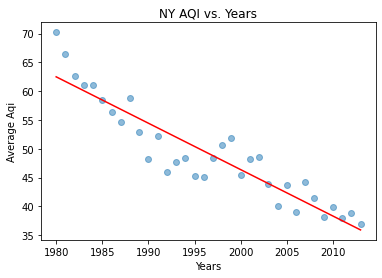

This is the linear regression for NY, using years as the predictor variable and average aqi as the output variable: -0.81
This is the coefficient of determination (r_squared): 0.85


In [139]:
# Linear Regression for NY
NY_df = getStateAvgAQI('NY', union_aqi)
NY_lr = make_state_lr(NY_df)
plot_lr(NY_df, NY_lr, 'NY')
print("This is the linear regression for {}, using years as the predictor variable and average aqi as the output variable: {:.2f}".format('NY', NY_lr.coef_[0]))
print('This is the coefficient of determination (r_squared): {:.2f}'.format(NY_lr.score(NY_df[['year']], NY_df['avg_aqi'])))

<b>The Linear Regression for WA</b>

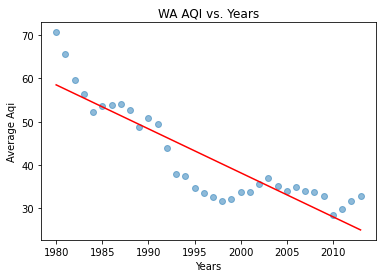

This is the linear regression for WA, using years as the predictor variable and average aqi as the output variable: -1.01
This is the coefficient of determination (r_squared): 0.79


In [140]:
# This is the graph WA AQI vs Year with LR
WA_df = getStateAvgAQI('WA', union_aqi)
WA_lr = make_state_lr(WA_df)
plot_lr(WA_df, WA_lr, 'WA')
print("This is the linear regression for {}, using years as the predictor variable and average aqi as the output variable: {:.2f}".format('WA', WA_lr.coef_[0]))
print('This is the coefficient of determination (r_squared): {:.2f}'.format(WA_lr.score(WA_df[['year']], WA_df['avg_aqi'])))

<b>The Linear Regression for MI</b>

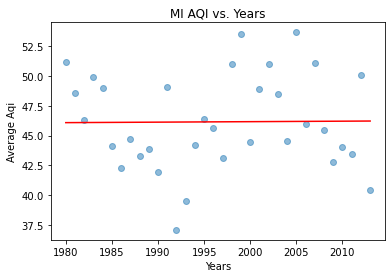

This is the linear regression for MI, using years as the predictor variable and average aqi as the output variable: 0.00
This is the coefficient of determination (r_squared): 0.00


In [141]:
# This is the graph WA AQI vs Year with LR
MI_df = getStateAvgAQI('MI', union_aqi)
MI_lr = make_state_lr(MI_df)
plot_lr(MI_df, MI_lr, 'MI')
print("This is the linear regression for {}, using years as the predictor variable and average aqi as the output variable: {:.2f}".format('MI', MI_lr.coef_[0]))
print('This is the coefficient of determination (r_squared): {:.2f}'.format(MI_lr.score(MI_df[['year']], MI_df['avg_aqi'])))

<b>Analysis of the 3 Linear Regressions Above:</b>

For both the regressions for WA and NY, the coefficient of determination are positive. On the other hand, the coefficient of determination for MI is 0. These coefficients signify that the avaerage yearly AQI is better represented in a linear fashion for NY and WA. The slope for WA and NY are both negative. This means there is a negative correlation between AQI and Year, but more significantly, it means that generally, with each passing year, the AQI decreases. For NY, with each passing year, the average AQI decreases by 0.81. For WA, with each passing year, the average AQI decreases by 1.01. For MI, however, both the slope and coefficient of determination are zero. The zero slope indicates that the AQI has been relatively neutral. From the graph however, the data points seem to move in a cyclic, very spread motion. More generally, all of the graphs seems to be moving in a cyclic motion, some areas are above the regression line and some are below the regression line. These changed in concavity could be due to the Earth's natural cyclic patterns.

### Finding the Linear Regression for the Yearly Per-State AQI

In the three example states above, the use of the functions were demonstrated. The outcome was that two of the states seem to be relatively good fits for linear regression. In addition, the trend between WA and NY was that AQI relatively decreased with each passing year. Is this true for all the states within the data set? The same type of analysis is performed for all the states/territories within the dataset.

Here: all the unique states are found.<br>
<b>Reminder:</b> RI is not included as a state, whereas Puerto Rico is.

In [142]:
states =  np.unique([i[-2:] for i in union_aqi['cbsa']])
print('These are the states: \n{}\nThis is the number of states/territories: {}'.format(states, states.shape[0]))

These are the states: 
['AK' 'AL' 'AR' 'AZ' 'CA' 'CO' 'CT' 'DE' 'FL' 'GA' 'HI' 'IA' 'ID' 'IL'
 'IN' 'KS' 'KY' 'LA' 'MA' 'MD' 'ME' 'MI' 'MN' 'MO' 'MS' 'MT' 'NC' 'ND'
 'NE' 'NH' 'NJ' 'NM' 'NV' 'NY' 'OH' 'OK' 'OR' 'PA' 'PR' 'SC' 'SD' 'TN'
 'TX' 'UT' 'VA' 'VT' 'WA' 'WI' 'WV' 'WY']
This is the number of states/territories: 50


getSlopeR2 returns a dataframe holding all the states and their respective slope from regression and r_squared value. The dropna in the for loop is for any states that might have had no observations for a given year. For example, SD had no observations for 1982 - 1984, which caused NaN to be passed in.

In [143]:
def getSlopeR2(states, df):
    '''
    states param is a list holding all the abbreviations of the states
    df is a dataframe like union_aqi
    returns a dataframe with the columns state, slope from regression and r_squared from regression
    '''
    
    slopes = []
    r_squared_vals = []

    for state in states:
        state_df = getStateAvgAQI(state, df)
        state_df.dropna(inplace = True)
        state_lr = make_state_lr(state_df)
        slopes.append(state_lr.coef_[0])
        r_squared_vals.append(state_lr.score(state_df[['year']], state_df['avg_aqi']))

    state_aqi_df = pd.DataFrame(data = states, columns = ['state'])
    state_aqi_df['slope'] = slopes
    state_aqi_df['r_squared'] = r_squared_vals
    return state_aqi_df

stateSlopeR2 = getSlopeR2(states, union_aqi)

In [144]:
stateSlopeR2.head(10)

,state,slope,r_squared
0,AK,-0.441926,0.335971
1,AL,-0.376512,0.289115
2,AR,-0.479759,0.297509
3,AZ,-0.896316,0.385808
4,CA,-0.290203,0.394252
5,CO,-0.048834,0.012430
6,CT,-0.939462,0.703208
7,DE,0.163047,0.021674
8,FL,-0.233304,0.385302
9,GA,0.014857,0.000294


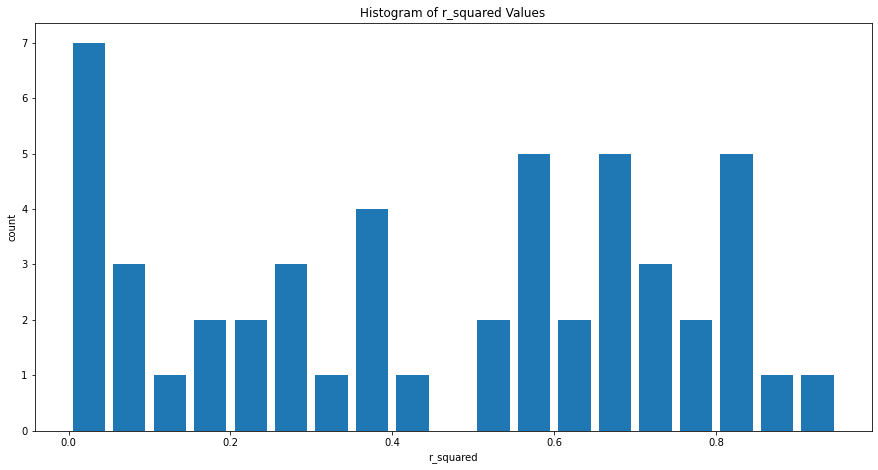

In [145]:
plt.figure(figsize = (15, 7.5))
plt.hist(stateSlopeR2['r_squared'], bins = np.arange(0, 1, .05), rwidth = .8)
plt.title('Histogram of r_squared Values')
plt.xlabel('r_squared')
plt.ylabel('count')
plt.show()

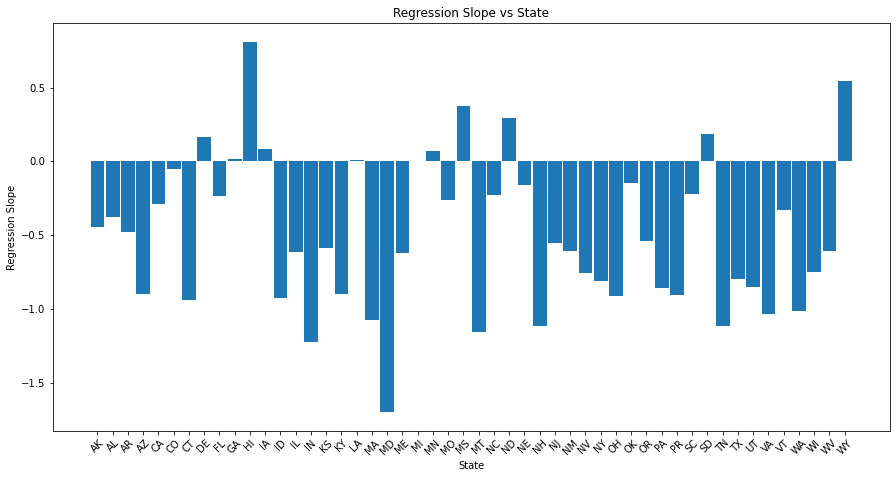

In [146]:
plt.figure(figsize = (15, 7.5))
plt.bar(stateSlopeR2['state'], stateSlopeR2['slope'], width = 0.9)
plt.title('Regression Slope vs State')
plt.xlabel('State')
plt.ylabel('Regression Slope')
plt.xticks(rotation = 45)
plt.show()

<b>Explanation of Histogram and Bar Graph:</b>

The purpose of the histogram is to show the distribution of the r_squared values for all the states after doing a linear regression per state. From the histogram, 10 of the r_squared values fall within the first two bins, which is [0, .1]. These 10 states indicate relative poor fits. However, roughly half of the states have a r_squared that is greater than or equal to 0.5, meaning that they have relatively fair fits. This shows that the data for some states is better represented by a linear model than others.

On the other hand, the bar graph shows the regression slope for each state. Visually, a majority of the states have a negative slope, meaning that the trend is generally negative. In other words, a general trend would be with each passing year, the average yearly AQI decreases. This trend is generally consistent with the results found in the example states above, where a majority of the slopes are negative. However, there is also a large chunk that have positive slopes, meaning that over the last 39 years, the AQI of the state worsened, thus this aspect will be analyzed next.

In [147]:
display(stateSlopeR2[stateSlopeR2['slope'] > 0])

,state,slope,r_squared
7,DE,0.163047,0.021674
9,GA,0.014857,0.000294
10,HI,0.809746,0.294821
11,IA,0.081271,0.078442
17,LA,0.009037,0.000388
21,MI,0.004089,0.000104
22,MN,0.072718,0.009966
24,MS,0.376406,0.236456
27,ND,0.293949,0.218570
40,SD,0.184999,0.048124


To contextualize this, here is a map of the United States with the states that have a positive slope highlighted in blue.

<img src="amCharts.jpg" width="500"/>

The one of the most interesting aspects of the map is that Hawaii is included in the states with positive AQI. This is surprising because Hawaii typically has an AQI that is the lowest out of all the states, and it has been consistent throughout time. In fact, it is known as the [State of the Air](https://www.lung.org/media/press-releases/hawaii-boasts-some-of-the#:https://www.usgs.gov/observatories/hawaiian-volcano-observatory/active-volcanoes-hawaii). We hypothesize that the increase could be due to Hawaii's natural climate and environment, which is very much different from that of the rest of the United States. Specifically, according to the United States Geological Survey, there was an increase in volcanic activity for the Kilauea Volcano. In fact, the [Pu'u 'O'o - Kupaianaha Eruptions](https://pubs.usgs.gov/fs/2002/fs144-02/) lasted from 1983 to 2003 and was the longest rift-zone eruptions in more than 600 years. Despite this ending in 2003, Kilauea remains to be an [active volcano](https://www.usgs.gov/observatories/hawaiian-volcano-observatory/active-volcanoes-hawaii) well through 2018. Volcanic Activity, which releases many of the air pollutants listed in the Data Description, could be the underlying cause of the increase in AQI seen in recent years.

Another interesting aspect of the map is that many of the states with positive slopes are clustered together, near the mid-north of the United States. This could be due to the amount of [wildfires](https://www.lung.org/blog/how-wildfires-affect-health) that occur in that region. With wildfires being frequent in the west and Canada over the recent years, the smoke can travel thousands of miles, the natural disaster affecting many of the regions around it. In fact, in 2015, [Canadian fire](https://earthobservatory.nasa.gov/images/86151/canadian-wildfires-produce-river-of-smoke) that broke out in the Northwest Territories, British Columbia, and Alberta had smoke reaching the states North Dakota, South Dakota, Minnesota, and Iowa. Wildfires, which substantially increase outdoor airborne particles and gaseous air pollutants, could be the underlying cause of the increase in AQI seen in these mid-west states over the recent years.

The third interesting aspect of the map is that the southeast region is seen to contain more [secondary organic aerosols](https://www.epa.gov/sciencematters/understanding-air-pollution-southeastern-united-states) (SOAs) than other areas of the United States. SOAs are air pollutants that are made from the chemical reaction of chemicals from plants, humans, and man-made products. EPA found that trees emit volatile organic compounds, VOCs, which react with man-made pollutants to create negative effects in air quality. The mixing of human-made pollutants and natural emitted pollutants is specifically focused in the southeast area of the United States because of the large forests in the area that are next to the cities. With more natural pollutants to combine with urban pollutants, the area has a particularly high amount of SOAs, which could be the underlying cause of the increase in AQI seen in these south-east states.

### Plotting the Monthly Average AQI for each State

Instead of plotting the yearly average AQI, we chose to also plot the monthly Average AQI in order to see if this will improve the linear regression.

mapping is a pandas series that indexes based on months_since the first date, which is 1980-01-01 and the values are the dates, excluding the days. For example, mapping[405] maps months_since = 405 to date = 2013-10-01

In [148]:
d = np.concatenate((np.unique(union_aqi['year_month']), np.unique(test_aqi['year_month'])))
mapping = pd.Series(data = d, index = np.concatenate((np.unique(union_aqi['months_since']), np.unique(test_aqi['months_since']))))
display(mapping)

0     1980-01-01
1     1980-02-01
2     1980-03-01
3     1980-04-01
4     1980-05-01
         ...    
463   2018-08-01
464   2018-09-01
465   2018-10-01
466   2018-11-01
467   2018-12-01
Length: 468, dtype: datetime64[ns]

The following function takes in a state's abbreviations ('NY') and a df like union_aqi and returns a df with the average aqi per month for that state.

In [149]:
def getStateMonthlyAvgAQI(state, df):
    '''
    state is a string of a specific state in question, format e.g: NY
    df is a dataframe like union_aqi
    returns a df with columns: year_month, avg_aqi
    '''
    avgs = []
    df = df[df['cbsa'].str.endswith(state)]
    delta_months = np.unique(df['months_since'])
    for delta_month in delta_months:
        avgs.append(df[df['months_since'] == delta_month]['aqi'].mean())
    state_df = pd.DataFrame(data = delta_months, columns = ['months_since'])
    state_df['avg_aqi'] = avgs
    state_df['date'] = mapping[state_df['months_since']].to_numpy()

    return state_df

The following function takes in the data frame for a state, containing both year_month and avg_aqi as columns, such as that returned by getStateMonthlyAvgAQI. The function returns a linear regression.

In [150]:
def make_state_monthly_lr(state_df):
    '''
    returns a lr for the dataframe state_df
    '''
    aqi_lr = lr()
    aqi_lr.fit(state_df[['months_since']], state_df['avg_aqi'])
    return aqi_lr

The following function takes in the data frame for a state, containing both year_month and avg_aqi as columns, such as that returned by getStateMonthlyAvgAQI. In addition, it takes in the linear regression where year_month is the input variable and avg_aqi is the output variable, such as that returned by make_state_monthly_lr. Lastly, it takes in the state's abbreviations.

In [151]:
def plot_monthly_lr(state_df, aqi_lr, state):
    '''
    param state_df is a dataframe with columns 'year_month' and 'avg_aqi'
    param aqi_lr is a linear regression for a specific state
    param state is a string for the state (format eg: NY)
    plots the lr and the data points from state_df(x var = year, y var = avg aqi)
    '''
    aqi_pred = aqi_lr.predict(state_df[['months_since']])
    plt.figure(figsize = (15, 7.5))
    plt.scatter(state_df['date'], state_df['avg_aqi'], alpha = 0.5)
    plt.plot(state_df['date'], aqi_pred, '-', color = 'red')
    plt.title("{} Average Monthly AQI vs. Months".format(state))
    plt.xlabel('Time (Years)')
    plt.ylabel('Average Aqi')
    plt.show()

### Using the Functions above on Example States: NY, WA, and MI

<b>The Linear Regression for NY based on Average Monthly AQI</b>

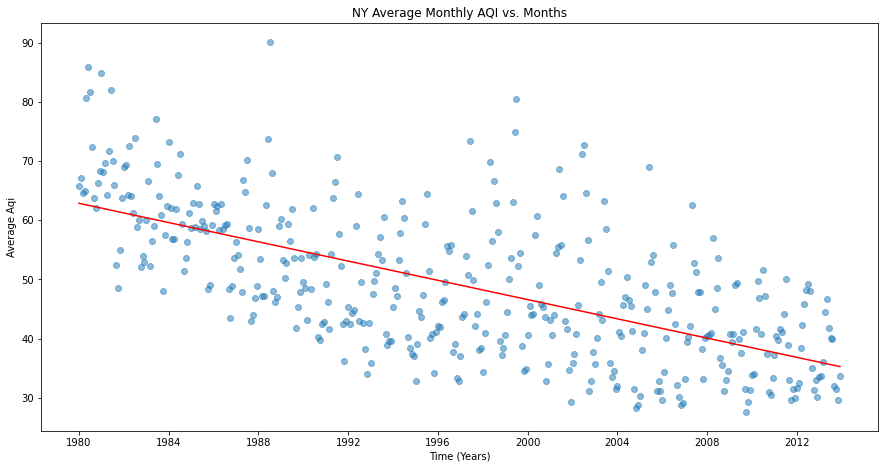

This is the linear regression for NY, using years as the predictor variable and average aqi as the output variable: -0.07
This is the coefficient of determination (r_squared): 0.42


In [152]:
NY_monthly_df = getStateMonthlyAvgAQI('NY', union_aqi)
ny_lr = make_state_monthly_lr(NY_monthly_df)
plot_monthly_lr(NY_monthly_df, ny_lr, 'NY')
print("This is the linear regression for {}, using years as the predictor variable and average aqi as the output variable: {:.2f}".format('NY', ny_lr.coef_[0]))
print('This is the coefficient of determination (r_squared): {:.2f}'.format(ny_lr.score(NY_monthly_df[['months_since']], NY_monthly_df['avg_aqi'])))

<b>The Linear Regression for WA based on Average Monthly AQI</b>

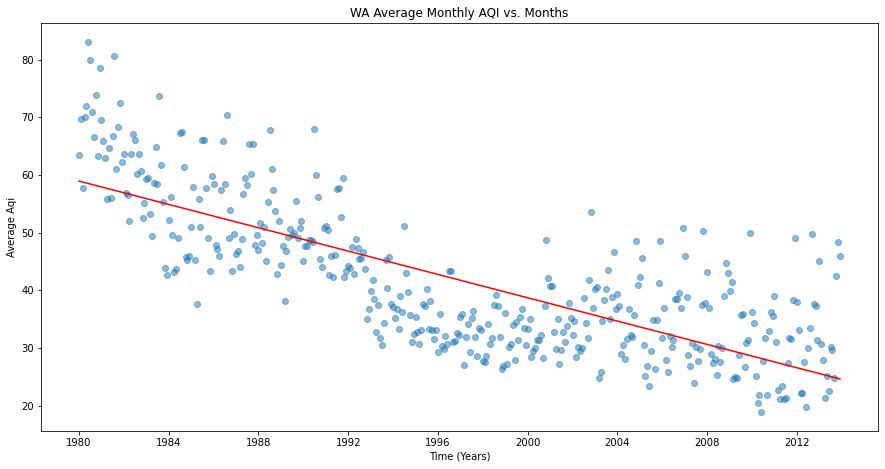

This is the linear regression for WA, using years as the predictor variable and average aqi as the output variable: -0.07
This is the coefficient of determination (r_squared): 0.59


In [153]:
WA_monthly_df = getStateMonthlyAvgAQI('WA', union_aqi)
wa_lr = make_state_monthly_lr(WA_monthly_df)
plot_monthly_lr(WA_monthly_df, wa_lr, 'WA')
print("This is the linear regression for {}, using years as the predictor variable and average aqi as the output variable: {:.2f}".format('WA', ny_lr.coef_[0]))
print('This is the coefficient of determination (r_squared): {:.2f}'.format(wa_lr.score(WA_monthly_df[['months_since']], WA_monthly_df['avg_aqi'])))

<b>The Linear Regression for MI based on Average Monthly AQI</b>

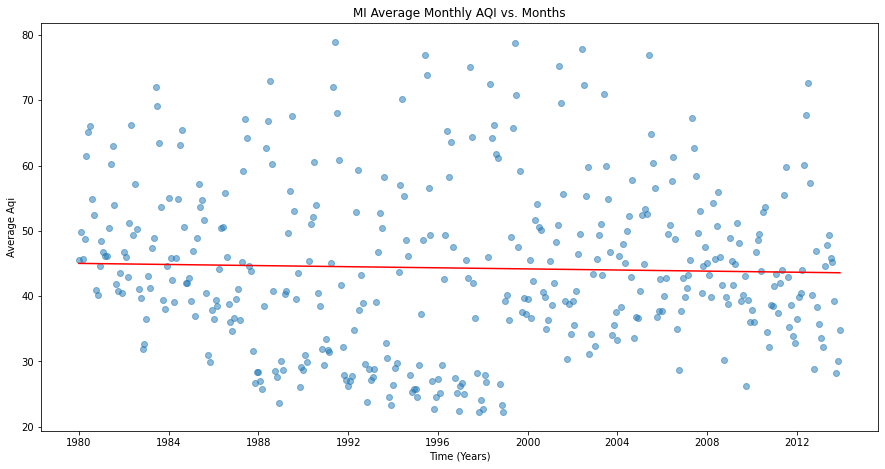

This is the linear regression for MI, using years as the predictor variable and average aqi as the output variable: -0.00
This is the coefficient of determination (r_squared): 0.00


In [154]:
MI_monthly_df = getStateMonthlyAvgAQI('MI', union_aqi)
mi_lr = make_state_monthly_lr(MI_monthly_df)
plot_monthly_lr(MI_monthly_df, mi_lr, 'MI')
print("This is the linear regression for {}, using years as the predictor variable and average aqi as the output variable: {:.2f}".format('MI', mi_lr.coef_[0]))
print('This is the coefficient of determination (r_squared): {:.2f}'.format(mi_lr.score(MI_monthly_df[['months_since']], MI_monthly_df['avg_aqi'])))

<b>Analysis of the Three Linear Regressions Above:</b>

Ultimately, the results from these regressions are very much similar to that of the regressions using yearly averages, which is, of course, to be expected because the yearly averages are a nice overall picture of the monthly data. Specifically, the slope for NY and WA are both negative while their coefficient of determination are both positive. In addition, the slope and r_squared for MI are both zero. This indicates that for Michigan, the overall monthly AQI has been relatively stable between 1980 and 2013. Visually from the graph, this is not really the case because the graph has a scattered motion of sorts. However, overall, it can be said that the AQI has remained relatively stable. Directly comparing the two methods of visualizing the data, the monthly visualizations seem have have much more widely spread range, whereas the yearly one seems to be much more concentrated. Generally, the coefficient of determination for both NY and WA has decreased. The scattering of the data seems to be responsible for this trend.

### Finding the Linear Regression for the Yearly Per-State AQI

In the three example states above, the use of the functions were demonstrated. The outcome was that two of the states seem to be relatively good fits for linear regression. In addition, the trend between those two states (NY and WA) was that AQI relatively decreased with each passing year. Is this generally true for all the states within the data set? The same type of analysis is performed for all the states/territories within the dataset. Essentially, the same sort of analysis done before is repeated here for comparison.

In [155]:
print('These are the states/territories in the datasets:')
print(states)

These are the states/territories in the datasets:
['AK' 'AL' 'AR' 'AZ' 'CA' 'CO' 'CT' 'DE' 'FL' 'GA' 'HI' 'IA' 'ID' 'IL'
 'IN' 'KS' 'KY' 'LA' 'MA' 'MD' 'ME' 'MI' 'MN' 'MO' 'MS' 'MT' 'NC' 'ND'
 'NE' 'NH' 'NJ' 'NM' 'NV' 'NY' 'OH' 'OK' 'OR' 'PA' 'PR' 'SC' 'SD' 'TN'
 'TX' 'UT' 'VA' 'VT' 'WA' 'WI' 'WV' 'WY']


In [156]:
def getMonthlySlopeR2(states, df):
    '''
    states param is a list holding all the abbreviations of the states
    df is a dataframe like union_aqi
    returns a dataframe with the columns state, slope from regression and r_squared from regression
    '''
    
    slopes = []
    r_squared_vals = []

    for state in states:
        state_df = getStateMonthlyAvgAQI(state, df)
        state_df.dropna(inplace = True)
        state_lr = make_state_monthly_lr(state_df)
        slopes.append(state_lr.coef_[0])
        r_squared_vals.append(state_lr.score(state_df[['months_since']], state_df['avg_aqi']))

    state_aqi_df = pd.DataFrame(data = states, columns = ['state'])
    state_aqi_df['slope'] = slopes
    state_aqi_df['r_squared'] = r_squared_vals
    return state_aqi_df

stateMonthlySlopeR2 = getMonthlySlopeR2(states, union_aqi)

In [157]:
stateMonthlySlopeR2.head(10)

,state,slope,r_squared
0,AK,-0.031793,0.044597
1,AL,-0.032754,0.080747
2,AR,-0.041241,0.114537
3,AZ,-0.076420,0.242579
4,CA,-0.022164,0.025529
5,CO,-0.004371,0.003196
6,CT,-0.077708,0.240843
7,DE,0.009560,0.002730
8,FL,-0.020427,0.084229
9,GA,-0.001871,0.000217


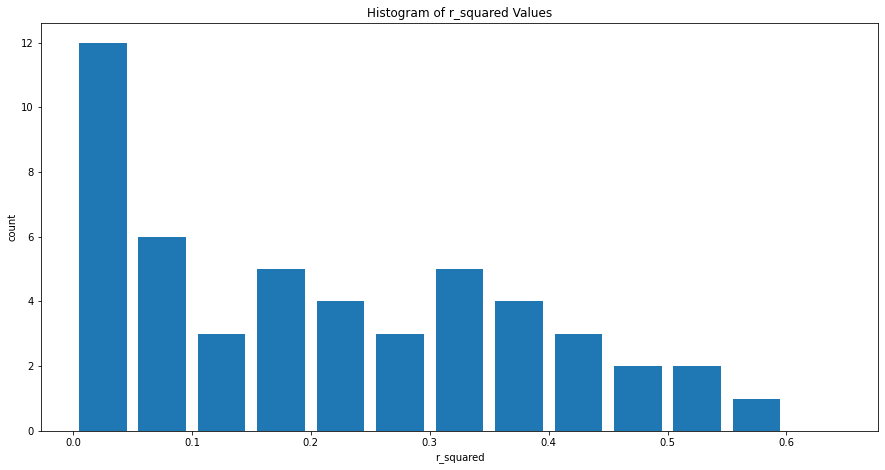

In [158]:
plt.figure(figsize = (15, 7.5))
plt.hist(stateMonthlySlopeR2['r_squared'], bins = np.arange(0, .7, .05), rwidth = .8)
plt.title('Histogram of r_squared Values')
plt.xlabel('r_squared')
plt.ylabel('count')
plt.show()

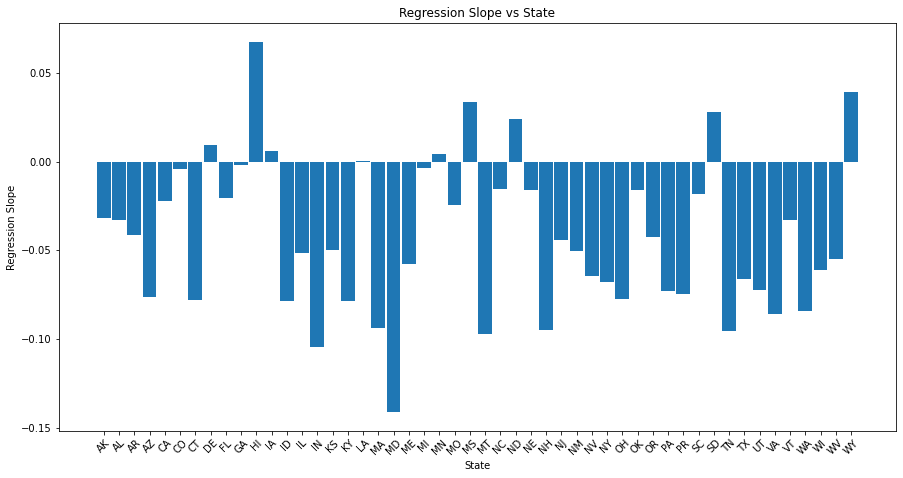

In [159]:
plt.figure(figsize = (15, 7.5))
plt.bar(stateMonthlySlopeR2['state'], stateMonthlySlopeR2['slope'], width = 0.9)
plt.title('Regression Slope vs State')
plt.xlabel('State')
plt.ylabel('Regression Slope')
plt.xticks(rotation = 45)
plt.show()

<b>Explanation of the Histogram and Bar Graph</b>

The histogram and the barplot are very similar to the ones before for yearly AQI. However, there are a few key differences. For starters, there are 18 states with r_squared that is in the range of [0, .1]. This means that they have relatively poor fits on a linear model. This is to be expected because the switch from yearly to monthly added significantly more data. In addition, monthly data is much more volatile because it is more susceptible to change. In contrast to the previous histogram, only 3 states have a r_squared greater than 0.5.

Despite these lower r_squared values, the data from the bar graph is nearly identical to that of the previous bar graph. A majority of the states have a negative slope, meaning that the overall trend is with each passing month, AQI typically decreases. However, one important note is that there are actually less states with positive slopes here. This difference might be a consequence of adding more data and having a yearly regression slope that is relatively close to zero.

In [160]:
display(stateMonthlySlopeR2[stateMonthlySlopeR2['slope'] > 0])

,state,slope,r_squared
7,DE,0.009560,0.002730
10,HI,0.067652,0.184076
11,IA,0.006065,0.010267
17,LA,0.000679,0.000043
22,MN,0.004225,0.002989
24,MS,0.033441,0.077040
27,ND,0.024252,0.132947
40,SD,0.028205,0.115271
49,WY,0.039573,0.287526


These are the states that have a positive slope, indicating that with each month, AQI increases. This list of states is a strict subset of the states with positive yearly regressions. However, two states are missing: GA and MI. From before, the reasoning is that since these two states had slopes that were relatively close to 0 from the yearly regressions (0.01 and 0.004, respectively) they are more prone to changes within the data. As a result, adding more points by switching to a monthly model most likely changed the slope slightly, thus making it negative.

### Further Analysis: Cyclic Motion

One topic that was briefly mentioned before was the cyclic nature of the data. From the scatter plots themselves, this is not apparently obvious, but below are some graphs connecting consecutive data points.

In [161]:
def plot_monthly_lr_cyclic(state_df, aqi_lr, state):
    '''
    param state_df is a dataframe with columns 'year_month' and 'avg_aqi'
    param aqi_lr is a linear regression for a specific state
    param state is a string for the state (format eg: NY)
    plots the lr and the data points from state_df(x var = year, y var = avg aqi)
    '''
    aqi_pred = aqi_lr.predict(state_df[['months_since']])
    plt.figure(figsize = (15, 7.5))
    plt.plot(state_df['date'], state_df['avg_aqi'], alpha = 0.5)
    plt.plot(state_df['date'], aqi_pred, '-', color = 'red')
    plt.title("{} Average Monthly AQI vs. Months".format(state))
    plt.xlabel('Time (Years)')
    plt.ylabel('Average Aqi')
    plt.show()

<b>Line plot of NY's Average Monthly AQI vs Years</b>

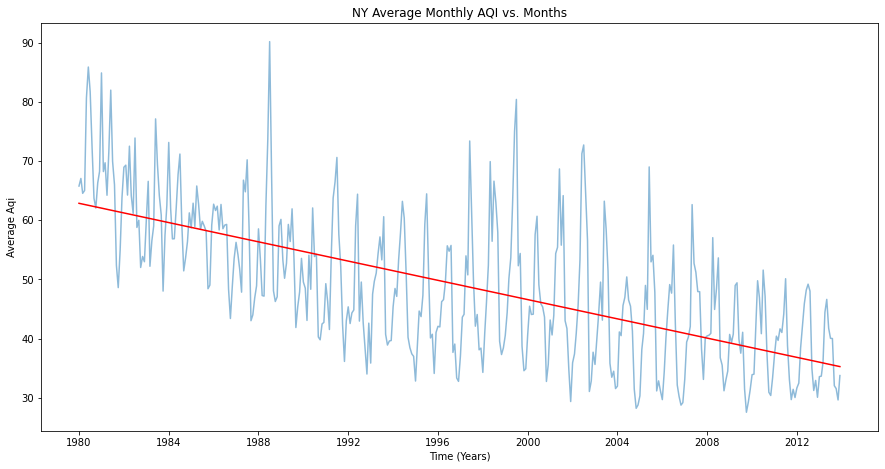

In [162]:
plot_monthly_lr_cyclic(NY_monthly_df, ny_lr, 'NY')

<b>Line plot of WA's Average Monthly AQI vs Years</b>

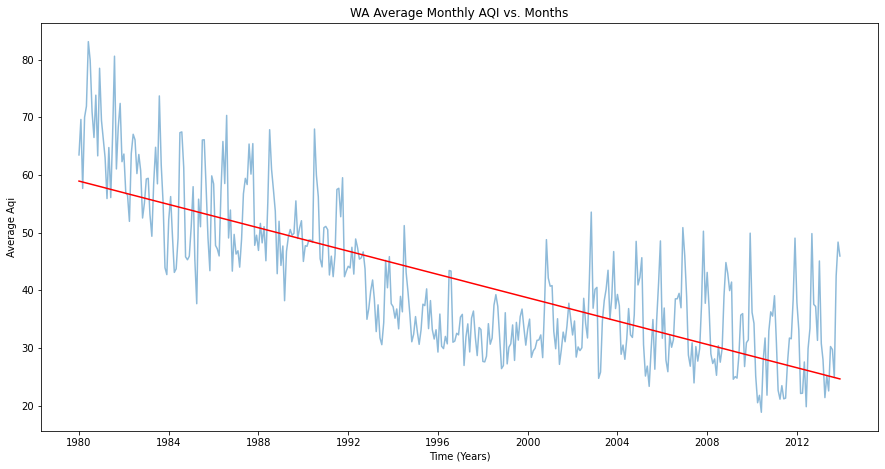

In [163]:
plot_monthly_lr_cyclic(WA_monthly_df, wa_lr, 'WA')

<b>Line plot of MI's Average Monthly AQI vs Years</b>

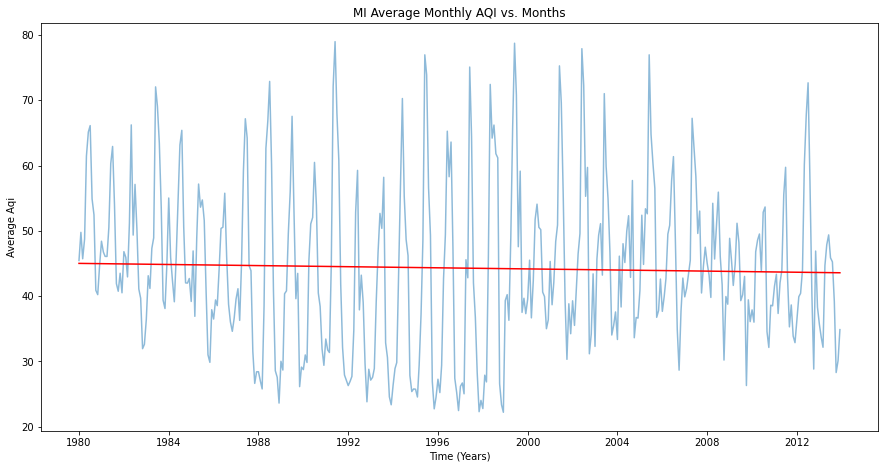

In [164]:
plot_monthly_lr_cyclic(MI_monthly_df, mi_lr, 'MI')

### Holt-Winters Model

The graphs shown above all have cyclic trends. This seasonality indicates that the [Holt-Winters Model (or Triple Exponential Smoothing)](https://en.wikipedia.org/wiki/Exponential_smoothing#Triple_exponential_smoothing_(Holt_Winters)) can be used to forecast data points because this method, given that the data points are seasonal, forecasts data points well. This method uses the cyclic patterns of the past to predict that of the future.

This functions gets the fit based on the avg_aqi column of the state_df, which is a dataframe like NY_monthly_df, which has months_since, avg_aqi, and date as the columns.

In [165]:
def get_fit(state_df):
    return ExponentialSmoothing(state_df['avg_aqi'], trend = 'add', seasonal = 'add', seasonal_periods = 12).fit()

plot_Holt_Winters(state_df, fit, state) takes the fit from get_fit and plots it on the graph with the original data from state_df. state_df is a dataframe like NY_monthly_df, which has months_since, avg_aqi, and date as the columns. The state is a string with state abbreviations.

In [166]:
def plot_Holt_Winters(state_df, fit, state):
    y_pred = fit.fittedvalues
    plt.figure(figsize = (15, 7.5))
    plt.plot(state_df['date'], state_df['avg_aqi'], alpha = 0.5, label = 'Original Data')
    plt.plot(state_df['date'], y_pred, '-', color = 'orange', alpha = 0.5, label = 'Fitted Data')
    plt.legend()
    plt.title("{} Average Monthly AQI vs. Months".format(state))
    plt.xlabel('Time (Years)')
    plt.ylabel('Average Aqi')
    plt.show()

<b>NY Holt-Winters(Exponential Smoothing) Line Graph for Monthly AQI vs. Years</b>

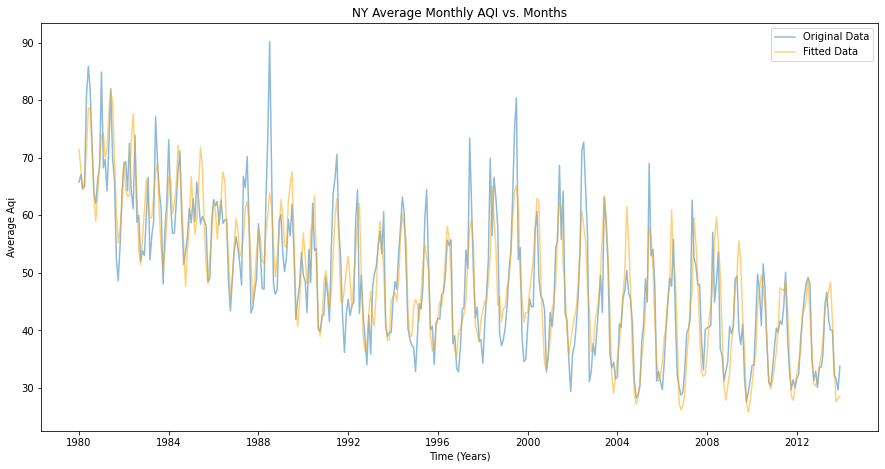

In [167]:
NY_fit = get_fit(NY_monthly_df)
plot_Holt_Winters(NY_monthly_df, NY_fit, 'NY')

<b>WA Holt-Winters(Exponential Smoothing) Line Graph for Monthly AQI vs. Years</b>

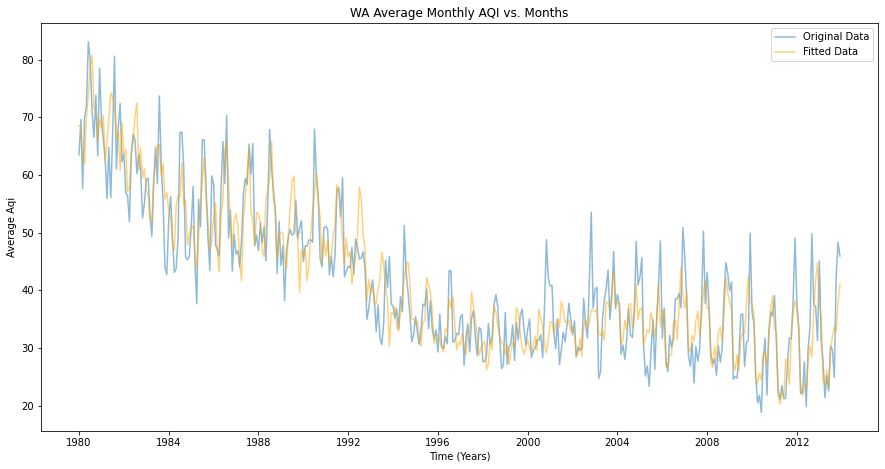

In [168]:
WA_fit = get_fit(WA_monthly_df)
plot_Holt_Winters(WA_monthly_df, WA_fit, 'WA')

<b>MI Holt-Winters(Exponential Smoothing) Line Graph for Monthly AQI vs. Years </b>

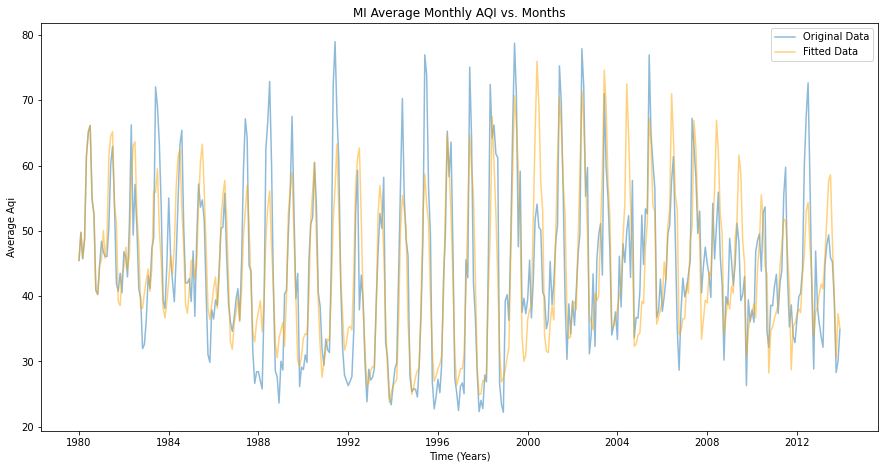

In [169]:
MI_fit = get_fit(MI_monthly_df)
plot_Holt_Winters(MI_monthly_df, MI_fit, 'MI')

<b>Explanation of the Three Line Graphs Above</b>

In comparison to the the linear regressions, the Holt-Winters Model provides a much more nuanced and detailed fit for all of the graphs. Visually, the fitted line graph is much closer and follows the pattern better than that of any of the linear regressions. This is because, as said before, the data has a cyclic motion and the Holt-Winters Model is a good way to represent that.

<b>However, how do the two regression styles compare mathematically?</b>

We use the [Mean Squared Error](https://en.wikipedia.org/wiki/Mean_squared_error) as a measurement of the error of each regression. We decided to use this to compare the two regressions because it has a simplier comparison, lower MSE typically means there is less errors. 

The Mean Squared Error is: ${MSE} ={\frac {1}{n}}\sum _{i=1}^{n}(Y_{i}-{\hat {Y_{i}}})^{2}.$
In other words, the Mean Squared Error is the average of the distances from the predicted value to the actual value, squared.

In [170]:
def get_MSE(states, df, test_df):
    '''
    states: arr of states
    df: dataframe to calculate regression
    test_df: actual dataframe to compare regression
    returns mean square error array of the states
    '''
    mse_list = []
    for state in states:
        state_df = getStateMonthlyAvgAQI(state, df)
        state_df.dropna(inplace = True)
        
        state_lr = make_state_monthly_lr(state_df)
        
        state_test_df = getStateMonthlyAvgAQI(state, test_df)
        state_test_df.dropna(inplace = True)

        aqi_pred = state_lr.predict(state_test_df[['months_since']])
        aqi_true = state_test_df['avg_aqi']
        
        mse_list.append(mean_squared_error(aqi_pred, aqi_true))
    return mse_list
        

The variable **linreg_mse** is a list of the mean squared errors for the linear regressions of each state in alphabetical order.

In [171]:
linreg_mse = get_MSE(states, union_aqi, test_aqi)

In [172]:
def get_holt_winters_MSE(states, df, test_df):
    '''
    states: arr of states
    df: dataframe to calculate regression
    test_df: actual dataframe to compare regression
    returns mean square error array of the states
    '''
    mse_list = []
    for state in states:
        state_df = getStateMonthlyAvgAQI(state, df)
        state_df.dropna(inplace = True)
        
        state_fit = get_fit(state_df)
        
        state_test_df = getStateMonthlyAvgAQI(state, test_df)
        state_test_df.dropna(inplace = True)

        aqi_pred = state_fit.forecast(state_test_df.shape[0])
        aqi_true = state_test_df['avg_aqi']
        
        mse_list.append(mean_squared_error(aqi_pred, aqi_true))
    return mse_list

The variable **holtwinters_mse** is a list of the mean squared errors for the Holt Winters Method for each state in alphabetical order.

In [173]:
holtwinters_mse = get_holt_winters_MSE(states, union_aqi, test_aqi)

In [174]:
holt_count = 0;
MSE_df = pd.DataFrame(data = states, columns = ['state'])
MSE_df['lr_mse'] = linreg_mse
MSE_df['hw_mse'] = holtwinters_mse
MSE_df['is_hw_better'] = MSE_df['hw_mse'] < MSE_df['lr_mse']
display(MSE_df)
print('The number of states that are better represented by the Holt Winters Model is {} out of {} states.'.format(MSE_df[MSE_df['is_hw_better']].shape[0], 50))

,state,lr_mse,hw_mse,is_hw_better
0,AK,432.812885,123.782678,True
1,AL,27.639477,58.516798,False
2,AR,33.381968,55.503489,False
3,AZ,114.356836,45.635201,True
4,CA,106.070367,55.544405,True
5,CO,98.313399,36.500728,True
6,CT,90.127123,72.406183,True
7,DE,132.471523,214.848402,False
8,FL,43.658035,14.117328,True
9,GA,70.800362,175.444479,False


The number of states that are better represented by the Holt Winters Model is 35 out of 50 states.


<b>MSE Calculations Explanation</b>

Above, the MSE for both the linear regression and Holt-Winters Method have been calculated for each state. The training data was the data for daily AQI (union_aqi), which is from 1980-2013. The test data, which was never used until now, was the daily aqi data (test_aqi) from 2014-2018. The Holt Winters Models were done in an 'additive' fashion, which assumed that trends are relatively constant over time. Using the MSE's per state, it was found that 38 out of the 50 states are better represented by the Holt Winters Method. Specifically, for MI, WA, and NY, the three example states used, all three were better represented by the Holt Winters Method. These results are consistent with the premise of the Holt Winters Method, which is that data with seasonality trends are better represented by the Holt Winters Method.

<b>However, if that is the case, why isn't every state better represented by the Holt Winters Model?</b>

The Holt Winters Model does have limitations. It assumes that trends within the data are going to be constant over time. It then uses this assumption to forecast future data. However, if this is not the case, then the Holt Winters Model will generate greater error. In addition, the Holt-Winters uses the most recent trends for predictions, which may cause more error especially if those recent trends are not part of the collective trends.

**graph_train_test** takes in state(string of state abbreviations), a train_aqi(df) like union_aqi, and test_aqi (df) like test_aqi. This function graphs the predicted values from linear regression and the Holt-Winters Method. It also graphs the original data.

In [175]:
def graph_train_test(state, train_aqi, test_aqi):
    state_monthly_df = getStateMonthlyAvgAQI(state, train_aqi)
    state_monthly_df.dropna(inplace = True)

    state_lr = make_state_monthly_lr(state_monthly_df)
    state_fit = get_fit(state_monthly_df)

    state_test_df = getStateMonthlyAvgAQI(state, test_aqi)
    state_test_df.dropna(inplace = True)

    lr_pred = state_lr.predict(state_test_df[['months_since']])
    hw_pred = state_fit.forecast(state_test_df.shape[0])

    plt.figure(figsize = (15, 7.5))
    #plot original data
    plt.plot(state_monthly_df['date'], state_monthly_df['avg_aqi'], alpha = 0.5)
    plt.plot(state_test_df['date'], state_test_df['avg_aqi'], alpha = 0.5, color = 'blue')
    #plot lr pred
    plt.plot(state_monthly_df['date'], state_lr.predict(state_monthly_df[['months_since']]), '-', color = 'red', label = 'LR Fitted Train Data')
    plt.plot(state_test_df['date'], lr_pred, '-', color = 'green', label = 'LR Fitted Test Data')
    #plot hw pred
    plt.plot(state_monthly_df['date'], state_fit.fittedvalues, '-', color = 'orange', alpha = 0.5, label = 'Holt-Winters Fitted Train Data')
    plt.plot(state_test_df['date'], hw_pred, '-', color = 'purple', alpha = 0.5, label = 'Holt-Winters Fitted Test Data')

    plt.legend()
    plt.title("{} Average Monthly AQI vs. Months".format(state))
    plt.xlabel('Time (Years)')
    plt.ylabel('Average Aqi')
    plt.show()

<b>Graphing the WY Average Monthly AQI vs Years and the Predicted Values from LR and Holt-Winters</b>

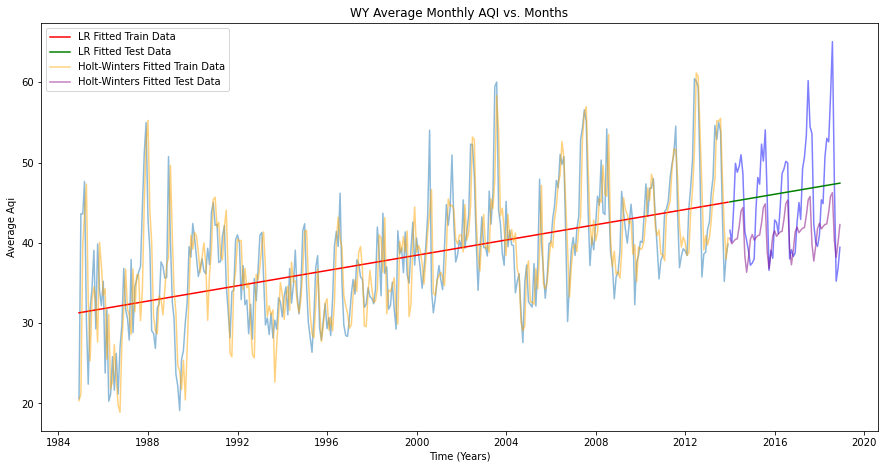

In [176]:
graph_train_test('WY', union_aqi, test_aqi)

<b>Graphing the NY Average Monthly AQI vs Years and the Predicted Values from LR and Holt-Winters</b>

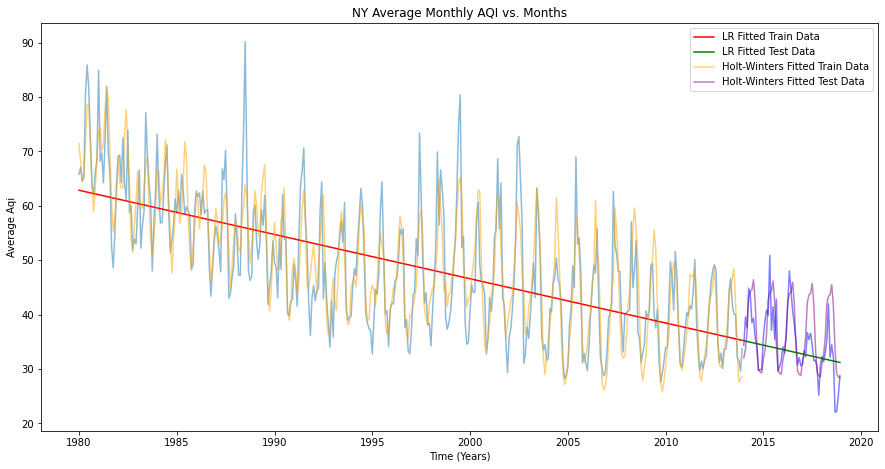

In [177]:
graph_train_test('NY', union_aqi, test_aqi)

<b>Analysis of the Two Graphs</b>

Above, the predictions from LR and the Holt-Winters Model are both plot. These two graphs demonstrate the faults and strength of the Hold-Winters Method and the situations where linear regression does better. In the graph for NY, the Holt-Winters model more accurately portrays the test data. This is because the most recent data stayed relatively constant. On the other hand, for the graph for WY, the linear regression model had a lower mean squared error. From the graph, the Holt-Winters Model consistently underfit the data and that is due to trends in the data. Specifically, when the average monthly AQI is at a local maximum, it has a tendency to drop in a very steep fashion. Then it will slowly climb (for example: around  1994 and 2005, this trend is noticeble). However, it looks like it was not the case for the test data. This underfitting of the data caused the error for the Holt-Winters model to be greater than that of the linear regression model.

## Analysis 2: How does Temperature vary with time in the U.S? How can we model it?

Similar to the Analysis 1, plots of average Temperature vs time will be drawn. In addition, the linear and Holts-Winters Models will be used again because the premise is very much like that of AQI. Unlike the portion for AQI, this portion focuses on Monthly Average Temperature because the increase in data points will help to make better models.

**getStateMonthlyAvgTemp** returns a dataframe with columns year_month and avg_temp for a single state. year_month holds datetime objects for the year and month (the day is set to 1 for all entries).

In [178]:
def getStateMonthlyAvgTemp(state, df):
    '''
    state is a string of a specific state in question, format e.g: NY
    df is a dataframe like union_temp
    returns a df with columns: year_month, avg_temp
    '''
    avgs = []
    df = df[df['cbsa_name'].str.endswith(state)]
    delta_months = np.unique(df['months_since'])
    for delta_month in delta_months:
        avgs.append(df[df['months_since'] == delta_month]['temp'].mean())
    state_df = pd.DataFrame(data = delta_months, columns = ['months_since'])
    state_df['avg_temp'] = avgs
    state_df['date'] = mapping[state_df['months_since']].to_numpy()

    return state_df

**make_state_lr_temp** takes in a df like union_df, limited to a single state however, and makes a linear regression from it.

In [179]:
def make_state_lr_temp(state_temp_df):
    '''
    returns a lr for the dataframe state_temp_df
    '''
    temp_lr = lr()
    temp_lr.fit(state_temp_df[['months_since']], state_temp_df['avg_temp'])
    return temp_lr

**plot_monthly_lr** generates a plot using the state_df returned from **getStateMonthlyAvgTemp** and the linear regression from **aqi_lr** for a specific state.

In [180]:
def plot_monthly_lr_temp(state_df, temp_lr, state):
    '''
    param state_df is a dataframe with columns 'year_month' and 'avg_temp'
    param temp_lr is a linear regression for a specific state
    param state is a string for the state (format eg: NY)
    plots the lr and the data points from state_df(x var = year, y var = avg aqi)
    '''
    temp_pred = temp_lr.predict(state_df[['months_since']])
    plt.figure(figsize = (15, 7.5))
    plt.plot(state_df['date'], state_df['avg_temp'], alpha = 0.5)
    plt.plot(state_df['date'], temp_pred, '-', color = 'red')
    plt.title("{} Average Monthly Temp. vs. Years".format(state))
    plt.xlabel('Time (Years)')
    plt.ylabel('Average Temperature (Fahrenheit)')
    plt.show()

### Linear Regression Model for the example states: NY, WA and MI

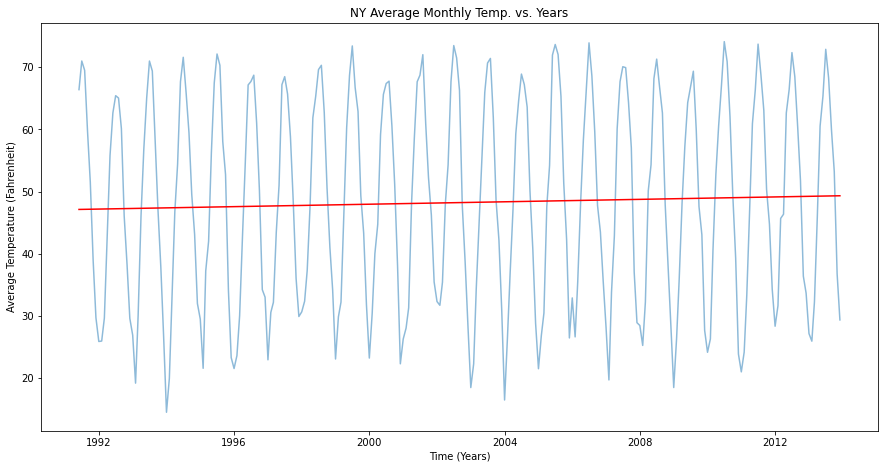

This is the linear regression for NY, using years as the predictor variable and average temp as the output variable: 0.008
This is the coefficient of determination (r_squared): 0.00


In [181]:
NY_monthly_temp_df = getStateMonthlyAvgTemp('NY', union_temp)
ny_temp_lr = make_state_lr_temp(NY_monthly_temp_df)
plot_monthly_lr_temp(NY_monthly_temp_df, ny_temp_lr, 'NY')
print("This is the linear regression for {}, using years as the predictor variable and average temp as the output variable: {:.3f}".format('NY', ny_temp_lr.coef_[0]))
print('This is the coefficient of determination (r_squared): {:.2f}'.format(ny_temp_lr.score(NY_monthly_temp_df[['months_since']], NY_monthly_temp_df['avg_temp'])))

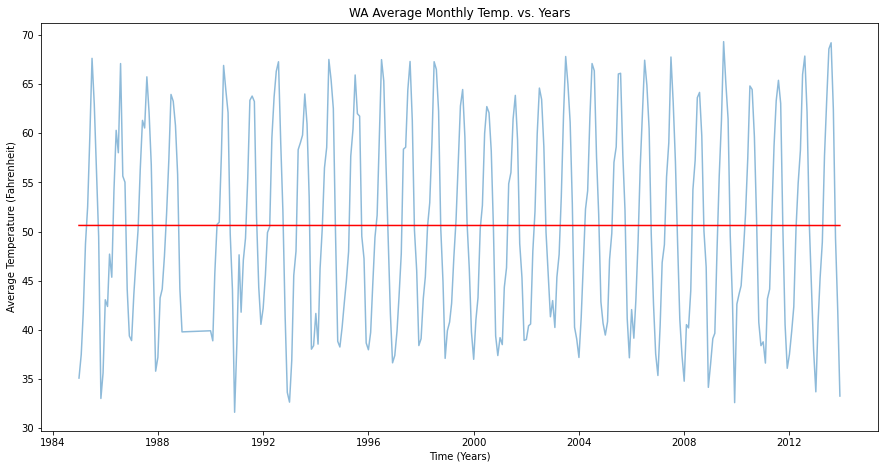

This is the linear regression for WA, using years as the predictor variable and average temp as the output variable: -0.0000
This is the coefficient of determination (r_squared): 0.00


In [182]:
WA_monthly_temp_df = getStateMonthlyAvgTemp('WA', union_temp)
wa_temp_lr = make_state_lr_temp(WA_monthly_temp_df)
plot_monthly_lr_temp(WA_monthly_temp_df, wa_temp_lr, 'WA')
print("This is the linear regression for {}, using years as the predictor variable and average temp as the output variable: {:.4f}".format('WA', wa_temp_lr.coef_[0]))
print('This is the coefficient of determination (r_squared): {:.2f}'.format(wa_temp_lr.score(WA_monthly_temp_df[['months_since']], WA_monthly_temp_df['avg_temp'])))

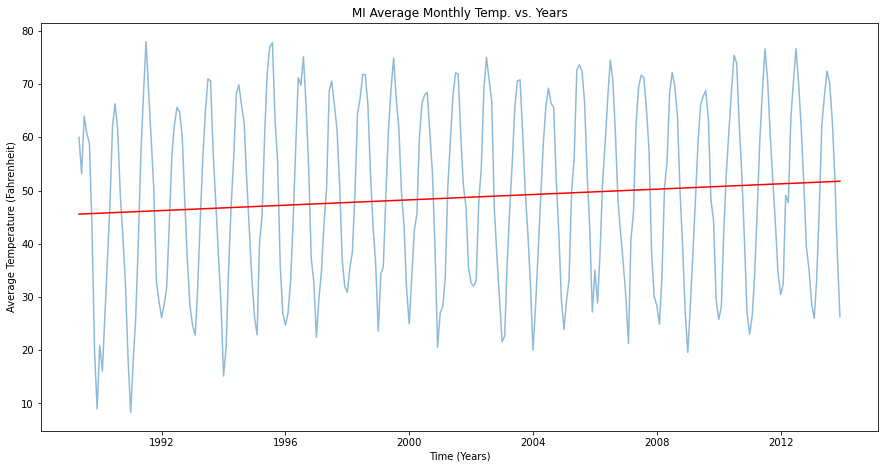

This is the linear regression for MI, using years as the predictor variable and average temp as the output variable: 0.021
This is the coefficient of determination (r_squared): 0.01


In [183]:
MI_monthly_temp_df = getStateMonthlyAvgTemp('MI', union_temp)
mi_temp_lr = make_state_lr_temp(MI_monthly_temp_df)
plot_monthly_lr_temp(MI_monthly_temp_df, mi_temp_lr, 'MI')
print("This is the linear regression for {}, using years as the predictor variable and average temp as the output variable: {:.3f}".format('MI', mi_temp_lr.coef_[0]))
print('This is the coefficient of determination (r_squared): {:.2f}'.format(mi_temp_lr.score(MI_monthly_temp_df[['months_since']], MI_monthly_temp_df['avg_temp'])))

**Analysis of the Three Graphs Above**

The three graphs above show the linear regression with months as the input variable and average temperature as the output variable. In all the graphs, the slope was very close to 0, indicating that in a span of roughly 3 decades, the average temperature stayed relatively constant. Although the average temperature stayed relatively constant, the In all the graphs, the coefficient of determination were all 0 (or relatively close to), which means that the data is not modeled well by a linear model. This is understandable because temperature is heavily dependent on the time of year, which means it is dependent on the months. Therefore, a linear model was not the most appropriate choice to model this data.

### Finding the Linear Regression for the Average, Monthly Temperature - per state

Since the Temperature datasets do not include PR, states_temp is set up here to avoid discrepancies.

In [199]:
states_temp = np.unique([i[-2:] for i in union_temp['cbsa_name']])
display(states_temp)

array(['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DE', 'FL', 'GA', 'HI',
       'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME', 'MI',
       'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM', 'NV',
       'NY', 'OH', 'OK', 'OR', 'PA', 'SC', 'SD', 'TN', 'TX', 'UT', 'VA',
       'VT', 'WA', 'WI', 'WV', 'WY'], dtype='<U2')

In [317]:
test_states = np.unique([i[-2:] for i in test_temp['cbsa_name']])
test_states = np.delete(test_states, np.where(test_states == 'PR'))
display(states_temp2)

array(['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'FL', 'GA', 'HI', 'IA',
       'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME', 'MI', 'MN',
       'MO', 'MS', 'MT', 'NC', 'ND', 'NH', 'NJ', 'NM', 'NV', 'NY', 'OH',
       'OK', 'OR', 'PA', 'PR', 'SC', 'SD', 'TN', 'TX', 'UT', 'VA', 'VT',
       'WA', 'WI', 'WV', 'WY'], dtype='<U2')

In [184]:
def getMonthlySlopeR2Temp(states, df):
    '''
    states param is a list holding all the abbreviations of the states
    df is a dataframe like union_temp
    returns a dataframe with the columns state, slope from regression and r_squared from regression
    '''
    
    slopes = []
    r_squared_vals = []
    
    for state in states:
        state_df = getStateMonthlyAvgTemp(state, df)
        state_df.dropna(inplace = True)
        state_lr = make_state_lr_temp(state_df)
        slopes.append(state_lr.coef_[0])
        r_squared_vals.append(state_lr.score(state_df[['months_since']], state_df['avg_temp']))

    state_temp_df = pd.DataFrame(data = states, columns = ['state'])
    state_temp_df['slope'] = slopes
    state_temp_df['r_squared'] = r_squared_vals
    return state_temp_df

slopeR2Temp = getMonthlySlopeR2Temp(states_temp, union_temp)

In [185]:
slopeR2Temp.head(10)

,state,slope,r_squared
0,AK,0.004894,0.000165
1,AL,-0.024455,0.046738
2,AR,0.001530,0.000061
3,AZ,0.010943,0.004755
4,CA,0.013221,0.025557
5,CO,0.171968,0.148269
6,CT,-0.001683,0.000165
7,DE,0.014575,0.000782
8,FL,-0.003456,0.003452
9,GA,-0.009321,0.002290


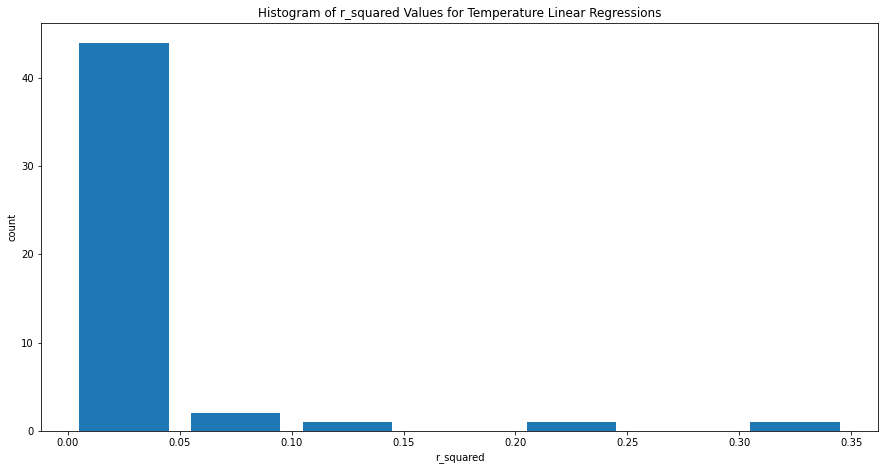

In [186]:
plt.figure(figsize = (15, 7.5))
plt.hist(slopeR2Temp['r_squared'], bins = np.arange(0, .4, .05), rwidth = .8)
plt.title('Histogram of r_squared Values for Temperature Linear Regressions')
plt.xlabel('r_squared')
plt.ylabel('count')
plt.show()

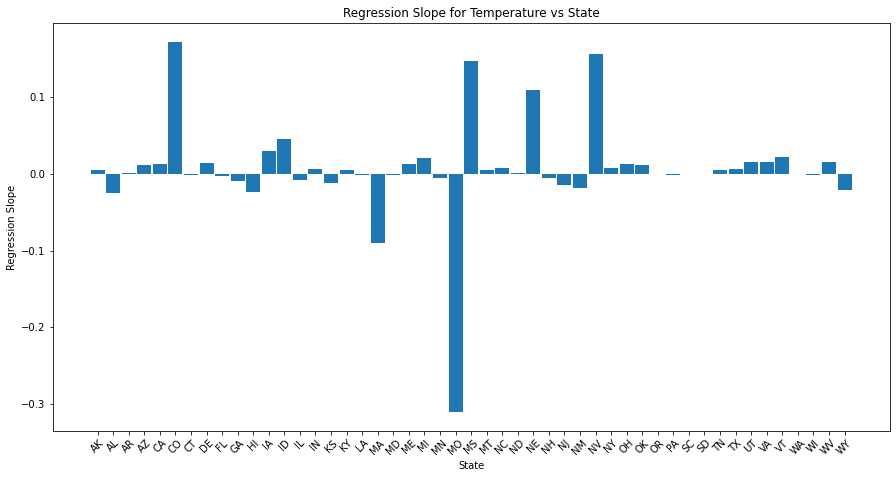

In [187]:
plt.figure(figsize = (15, 7.5))
plt.bar(slopeR2Temp['state'], slopeR2Temp['slope'], width = 0.9)
plt.title('Regression Slope for Temperature vs State')
plt.xlabel('State')
plt.ylabel('Regression Slope')
plt.xticks(rotation = 45)
plt.show()

<b>Explanation of the Histogram and Bar Graph</b>

The histogram reveals the r_squared values after doing a linear regression for each state. This includes all states except Puerto Rico and Rhode Island. The histogram is revealing about around 43 of the regressions had a coefficient of determination that is in the first interval [0, 0.05]. This reiterates what was said before in the regressions done for the example states, that the data for temperature is not well fit under a linear model. Again, this is due to the seasonality of temperature.

The bar plot shows the slopes after doing a linear regression with months as the input variable and temperature as the output variable. The barplot shows that the data seems to be very scattered, which no visible trends. For a lot of the states, the slope was very close to 0, indicating that their average temperature was neutral over the months. In addition, some states had positive slopes and others had negative slopes, but there were no distinguishable trends.


### Holt-Winters Model

In [188]:
def get_temp_fit(state_df):
    return ExponentialSmoothing(state_df['avg_temp'], trend = 'add', seasonal = 'add', seasonal_periods = 12).fit()

In [189]:
def plot_Holt_Winters_temp(state_df, fit, state):
    y_pred = fit.fittedvalues
    plt.figure(figsize = (15, 7.5))
    plt.plot(state_df['date'], state_df['avg_temp'], alpha = 0.5, label = 'Original Data')
    plt.plot(state_df['date'], y_pred, '-', color = 'orange', alpha = 0.5, label = 'Fitted Data')
    plt.legend()
    plt.title("{} Average Monthly Temp vs. Months".format(state))
    plt.xlabel('Time (Years)')
    plt.ylabel('Average Temperature (Fahrenheit)')
    plt.show()

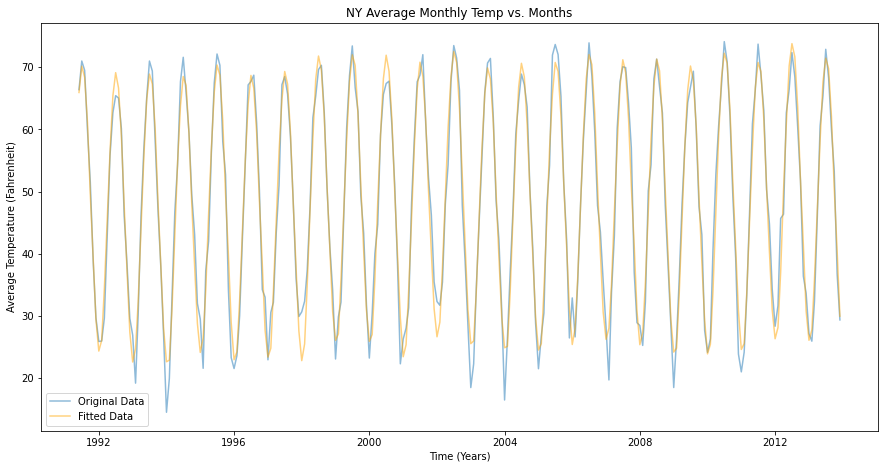

In [190]:
NY_temp_fit = get_temp_fit(NY_monthly_temp_df)
plot_Holt_Winters_temp(NY_monthly_temp_df, NY_temp_fit, 'NY')

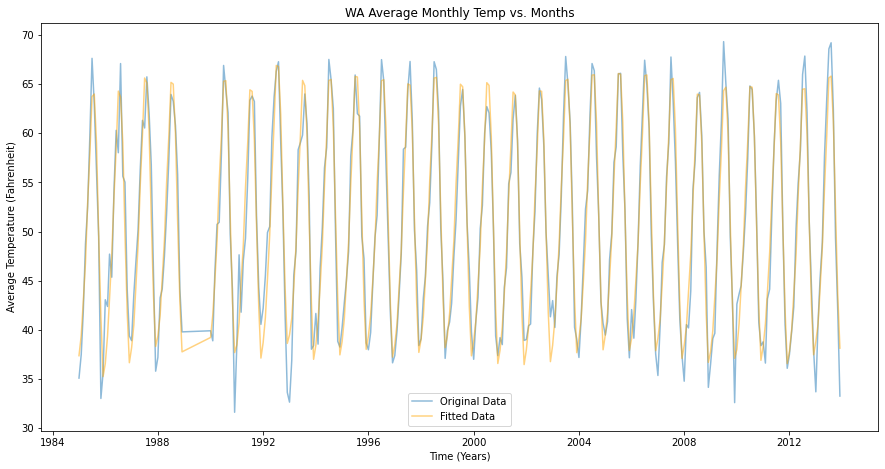

In [191]:
WA_temp_fit = get_temp_fit(WA_monthly_temp_df)
plot_Holt_Winters_temp(WA_monthly_temp_df, WA_temp_fit, 'WA')

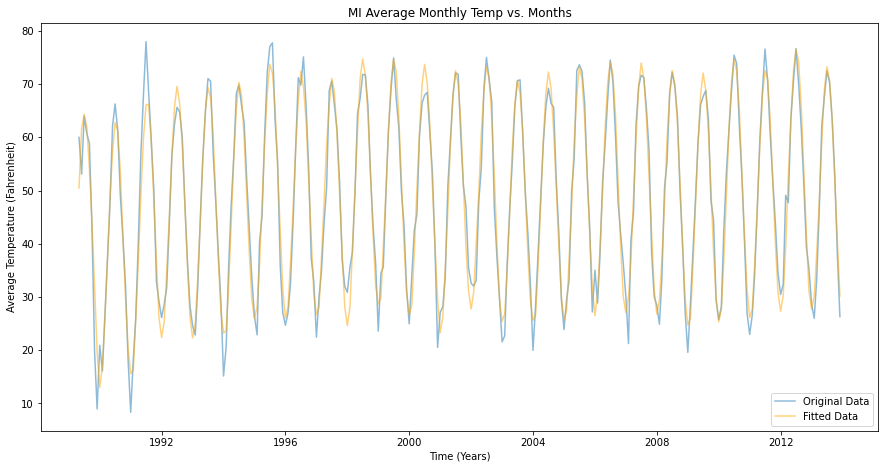

In [192]:
MI_temp_fit = get_temp_fit(MI_monthly_temp_df)
plot_Holt_Winters_temp(MI_monthly_temp_df, MI_temp_fit, 'MI')

**Explanation of the Three Line Graphs Above**

In comparison to the the linear regressions, the Holt-Winters Model provides a much more nuanced and detailed fit for all of the graphs. Visually, the fitted line graph is much closer and follows the pattern better than that of any of the linear regressions. This is because, as said before, the data of temperature has a cyclic motion in each state. The Holt-Winters Model is a good way to represent the change in seasons.

<b> Mean Square Error for the Temperature models </b>

In [221]:
def get_temp_MSE(test_states, df, test_df):
    '''
    test_states: arr of states
    df: dataframe to calculate regression
    test_df: actual dataframe to compare regression
    returns mean square error array of the states
    '''
    mse_list = []

    for state in test_states:
        state_df = getStateMonthlyAvgTemp(state, df)
        state_df.dropna(inplace = True)
        
        state_lr = make_state_lr_temp(state_df)
        
        state_test_df = getStateMonthlyAvgTemp(state, test_df)
        state_test_df.dropna(inplace = True)
    
        temp_pred = state_lr.predict(state_test_df[['months_since']])
        temp_true = state_test_df['avg_temp']
        
        mse_list.append(mean_squared_error(temp_pred, temp_true))
    return mse_list
        

In [222]:
linreg_temp_mse = get_temp_MSE(test_states, union_temp, test_temp)

In [223]:
def get_temp_holt_winters_MSE(test_states, df, test_df):
    '''
    test_states: arr of states
    df: dataframe to calculate regression
    test_df: actual dataframe to compare regression
    returns mean square error array of the states
    '''
    mse_list = []
    for state in test_states:
        state_df = getStateMonthlyAvgTemp(state, df)
        state_df.dropna(inplace = True)
        
        state_fit = get_temp_fit(state_df)
        
        state_test_df = getStateMonthlyAvgTemp(state, test_df)
        state_test_df.dropna(inplace = True)

        temp_pred = state_fit.forecast(state_test_df.shape[0])
        temp_true = state_test_df['avg_temp']
        
        mse_list.append(mean_squared_error(temp_pred, temp_true))
    return mse_list

In [270]:
holtwinters_temp_mse = get_temp_holt_winters_MSE(test_states, union_temp, test_temp)

In [248]:
temp_MSE_df = pd.DataFrame(data = test_states, columns = ['state'])
temp_MSE_df['lr_mse'] = linreg_temp_mse
temp_MSE_df['hw_mse'] = holtwinters_temp_mse
temp_MSE_df['is_hw_better'] = (temp_MSE_df['hw_mse'] < temp_MSE_df['lr_mse'])
display(temp_MSE_df)
print('The number of states that are better represented by the Holt Winters Model is {} out of {} states.'.format(temp_MSE_df[temp_MSE_df['is_hw_better']].shape[0], len(test_states)))

,state,lr_mse,hw_mse,is_hw_better
0,AK,523.607244,10211.062314,False
1,AL,240.688494,3250.635499,False
2,AR,205.386305,24.559216,True
3,AZ,158.324280,9.090316,True
4,CA,87.797654,6.421956,True
5,CO,962.881471,383.814778,True
6,CT,252.338302,14.791086,True
7,FL,53.844653,5.849775,True
8,GA,172.796464,30.727218,True
9,HI,104.500794,7.982779,True


The number of states that are better represented by the Holt Winters Model is 40 out of 47 states.


<b>MSE Calculations Explanation</b>

Above, the MSE for both the linear regression and Holt-Winters Method have been calculated for each state. The training data was the data for daily temperature (union_aqi), which is from 1980-2013. The test data, which was never used until now, was the daily temperature data (test_aqi) from 2014-2018. Using the MSE's per state, it was found that 40 out of the 47 states are better represented by the Holt Winters Method. We realized that it was out of 47 states because the test data contained Puerto Rico and Nevada, which was not found in the 1980-2013 data. The test data did not include Delaware however, which was found in the 1980-2013 data. Three states were removed from the MSE comparison. Specifically, for NY, MA, and MI, the three example states used, all three were better represented by the Holt Winters Method. These states in particular had MSE values 18.80, 21.22, and 16.40 resepctively for the Holt Winters method. These results are consistent with the premise of the Holt Winters Method, which is that data with seasonality trends are better represented by the Holt Winters Method. A majority of the states, a total of 40, follow this model more closely when graphing the state's temperature over the time of 2014-2018.

<b>However, if that is the case, why isn't there still 7 states not represented the best by the Holt Winters model?</b>

The Holt Winters Model still has limitation when it comes to temperature. It assumes that trends within the data are going to be constant over time. It then uses this assumption to forecast future data. However, if this is not the case, then the Holt Winters Model will generate greater error. In addition, the Holt-Winters uses the most recent trends for predictions, which may cause more error especially if those recent trends are not part of the collective trends.

**graph_train_test_temp** takes in state(string of state abbreviations), a train (df) like union_temp, and test (df) like test_temp. This function graphs the predicted values from linear regression and the Holt-Winters Method. It also graphs the original data.

In [239]:
def graph_train_test_temp(state, train, test):
    state_monthly_df = getStateMonthlyAvgTemp(state, train)
    state_monthly_df.dropna(inplace = True)

    state_lr = make_state_lr_temp(state_monthly_df)
    state_fit = get_temp_fit(state_monthly_df)

    state_test_df = getStateMonthlyAvgTemp(state, test)
    state_test_df.dropna(inplace = True)

    lr_pred = state_lr.predict(state_test_df[['months_since']])
    hw_pred = state_fit.forecast(state_test_df.shape[0])

    plt.figure(figsize = (15, 7.5))
    #plot original data
    plt.plot(state_monthly_df['date'], state_monthly_df['avg_temp'], alpha = 0.5)
    plt.plot(state_test_df['date'], state_test_df['avg_temp'], alpha = 0.5, color = 'blue')
    #plot lr pred
    plt.plot(state_monthly_df['date'], state_lr.predict(state_monthly_df[['months_since']]), '-', color = 'red', label = 'LR Fitted Train Data')
    plt.plot(state_test_df['date'], lr_pred, '-', color = 'green', label = 'LR Fitted Test Data')
    #plot hw pred
    plt.plot(state_monthly_df['date'], state_fit.fittedvalues, '-', color = 'orange', alpha = 0.5, label = 'Holt-Winters Fitted Train Data')
    plt.plot(state_test_df['date'], hw_pred, '-', color = 'purple', alpha = 0.5, label = 'Holt-Winters Fitted Test Data')

    plt.legend()
    plt.title("{} Average Monthly Temperature vs. Months".format(state))
    plt.xlabel('Time (Years)')
    plt.ylabel('Average Temperature (degrees Fahrenheit)')
    plt.show()

**Graphing the NV Average Monthly AQI vs Years and the Predicted Values from LR and Holt-Winters**



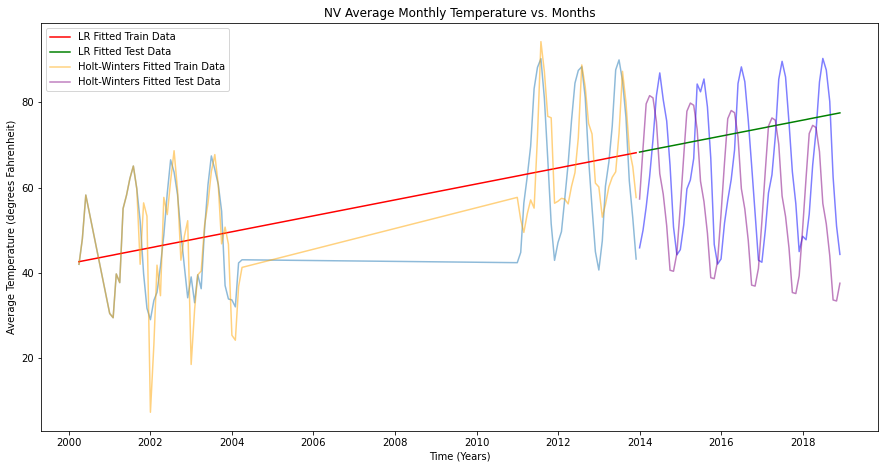

In [443]:
graph_train_test_temp('NV', union_temp, test_temp)

**Graphing the WY Average Monthly AQI vs Years and the Predicted Values from LR and Holt-Winters**

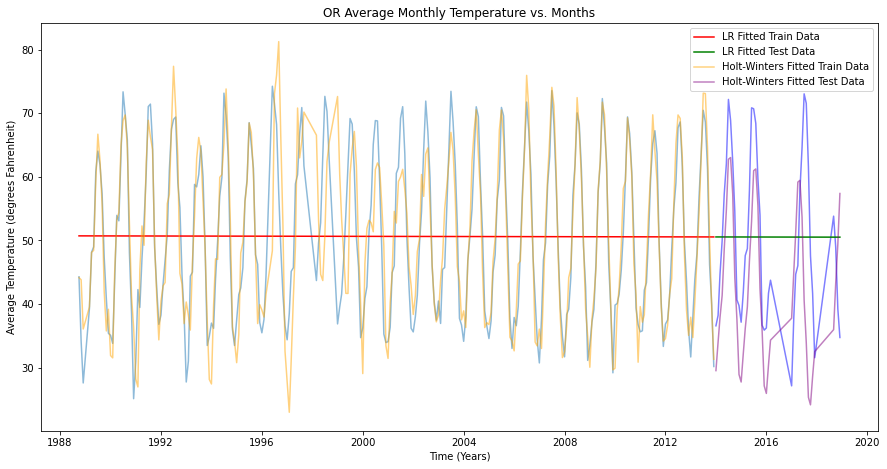

In [253]:
graph_train_test_temp('OR', union_temp, test_temp)

**Graphing the NY Average Monthly AQI vs Years and the Predicted Values from LR and Holt-Winters**

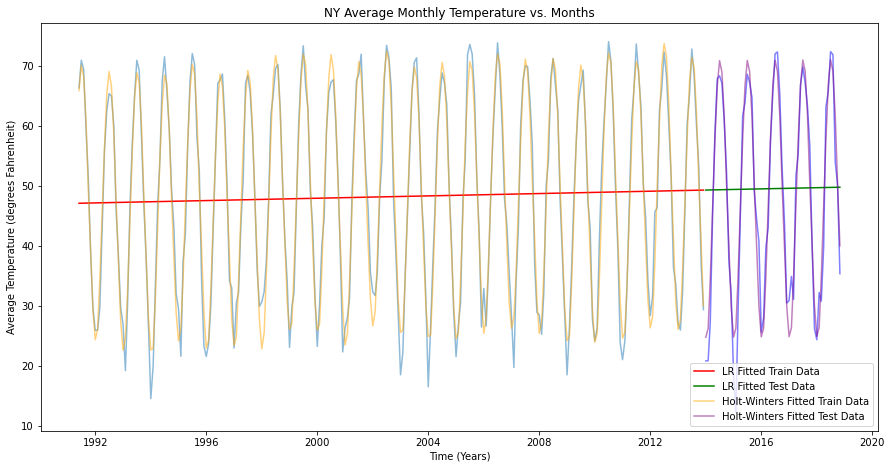

In [257]:
graph_train_test_temp('NY', union_temp, test_temp)

**Explanation of the above three graphs**

Above, the predictions from LR and the Holt-Winters Model are both plot for NV, WY, and NY. The three graphs demonstrate the faults and strength of the Holt-Winters Method, reasons to why the method may have failed for some, and the situations where linear regression does better. 

To start off, it can be seen that the Holt-Winters Method does not do the best in portraying NV, as seen by the MSE of 400.29 for Holt-Winters compared to 299.02 for linear regression. The reason for this would be because of the lack of data points avaiable from 2004 to 2011, which is therefore a limitation. This is similar to the situations found in five of the other states that have linear regression being a better model, which are AK, AL, OK, SD, and VT. With no data points, it's hard to forcast future points and therefore is hard to compare the trend of the years after this range with the Holt-Winters model because there are less years to go by. If there were more points, Holt-Winters may have done better than the linear regression line.

In the graph for NY, the Holt-Winters model more accurately portrays the test data than the linear regression model. This is because the most recent data stayed relatively constant and consistent with the trend of the other years. On the other hand, for the graph for OR, the linear regression model had a lower mean squared error than the Holt-Winters. This is different from the other 6 models who had limitations due to not being enough data points. Even with a number of data points, the Holt-Winters Model consistently underfit the data based on the past trend. For example in the months near 2016, the low local maximum prediction seems to have temperatures lower than the actual, which fit the linear regression more at this range since the linear regression was closer to the actual temperature. This underfitting of the data caused the error for the Holt-Winters model to be greater than that of the linear regression model.

**Change in the range of years to predict temperature**

If the range of the years used to model the temperature of 2014 to 2018 using Holt-Winters Method came from 1980 to 2000, would the Holt-Winters Method perform significantly different from the model that used from 1980 to 2013? 

In order to explore this the data from 1980 to 1999 was used instead as the train data, formed by using the union_temp2 dataframe.

union_states2 is used to get the states. As not all of the states had enough data to turn into the Holt Winters Model, we eliminated those states and kept the ones that worked, which totalled to 33 states.

In [454]:
union_states2 = np.unique([i[-2:] for i in union_temp['cbsa_name']])
union_states2 = ['CA','CT', 'GA', 'FL','HI', 'ID', 'IL', 'IN','KY', 'LA', 'MA', 'MD', 'ME', 'MI','MT', 'NC', 'ND','NH', 'NJ', 'NM','NY', 'OH', 'OK', 'OR', 'PA', 'SC', 'TN', 'TX', 'UT', 'VA',
       'VT', 'WA', 'WI']
print(len(union_states2))

33


The Holt Winters Model MSE was calculated to get the MSE for each state in the union_states2, which values were then compared in the range of the temperatures in the test data of 2014 to 2018 for the train data from 1980 to 1999.

In [455]:
holtwinters_temp_mse2 = get_temp_holt_winters_MSE(union_states2, union_temp2, test_temp)

The Holt Winters Model MSE was calculated to get the MSE for each state in the union_states2, which values were compared to the true temperature of 2014 to 2018 for the train data from 1980 to 2013.

In [456]:
holtwinters_temp_mse3 = get_temp_holt_winters_MSE(union_states2, union_temp, test_temp)

In [457]:
temp_MSE_df2 = pd.DataFrame(data = union_states2, columns = ['state'])
temp_MSE_df2['hw_mse1'] = holtwinters_temp_mse2
temp_MSE_df2['hw_mse2'] = holtwinters_temp_mse3

In [458]:
stats.ttest_ind(temp_MSE_df2['hw_mse1'], temp_MSE_df2['hw_mse2'], equal_var=False)

Ttest_indResult(statistic=1.0209296185086802, pvalue=0.3149443992582647)

# Evaluation of Significance

### Train test split 

The train-test split was done for AQI by having: 
- The data of the AQI (the union_aqi dataframe) per state per day in the years of 1980-2013 
    - This data was used to create a dataframe of the average AQI in months to predict the average AQI for the months of 2014-2018. The <b>train data</b> is the list of average monthly AQI predicted for each state in 2014-2018.
- The data of the AQI (the test_aqi dataframe) per state per day in the years of 2014-2018
    - This data was used to create a dataframe of the average AQI in months to compare the real average AQI for each month in 2014-2018 to the predicted ones from the test data. The <b>test data</b> is the list of the actual average monthly AQI for each state in 2014-2018.
    
Similarly, the train-test split was done for temperature by having: 
- The data of the temperature (the union_temp dataframe) per state per day in the years of 1980-2013 
    - This data was used to create a dataframe of the arithmetic mean temperature in months to predict the arithmetic mean temperature for the months of 2014-2018. The <b>train data</b> is the list of monthly arithmetic mean temperature predicted for each state in 2014-2018.
- The data of the temperature (the test_tempi dataframe) per state per day in the years of 2014-2018
    - This data was used to create a dataframe of the average AQI in months to compare the real arithmetic mean temperature for each month in 2014-2018 to the predicted ones from the test data. The <b>test data</b> is the list of the actual monthly arithmetic mean temperature for each state in 2014-2018.
   
### Mean Squared Error
<b> Linear regression model and Holt Winters Model for AQI </b>

Using the train data to create a dataframe of the average AQI of each month of 1980-2013, we created a linear regression and Holt-Winters model to try to predict the average AQI of each month in 2014-2018. The actual values of the average AQI 2014-2018 are separately found as the test data.  

To assess the regressions, we used the mean squared error (MSE) to show how far the points were from the actual data. After calculating the MSE for both of the models for each state, the models were compared to show which one represented the data better. The better model was chosen for each state based on which model had a smaller MSE. The higher the MSE, the farther the regression line is to the points, making the line a poorer fit. After finding out which model was better, it was seen that there were 35 out of 50 states that had the Holt-Winters model as the better fit.

<b> Linear regression model and Holt Winters Model for temperature </b>

Using the train data to create a dataframe of the arithmetic mean temperature of each month of 1980-2013, we created a linear regression and Holt-Winters model to try to predict the arithmetic mean temperature of each month in 2014-2018. The actual values of the average AQI 2014-2018 are separately found as the test data.  

Similarly with temperature, we used the MSE to show how far the points were and then compared the MSE of the linear regression to the Holt-Winter model to see which fit the data of each state better. We found that there were 40 out of 47 states that had the Holt-Winters model as the better fit. Three out of the 50 states in the 2014 to 2018 data had to be taken out due to not some states not occuring before 2014-2018 and some states not occuring in the set after 2014-2018.

### T-test for the Holt Winters Model for Temperature

With the t-test that compared the MSE of the 1980-1999 range with the MSE of the 1980-2013 range, we were able to get a t test value of 1.02, which shows that the data varies: it could be indistinguishable and could be distinguishable. The p-value obtained is 0.315, which shows that the value could have occurred 31.5% by chance. With the p value larger than 0.05, we can not conclude significance of the data as well.


## Interpretation and Conclusions

It was initially predicted that as the time increases, the AQI would increase. However, that was not the case. Using monthly data from the union_aqi dataframe, we graphed the linear trend of the average monthly AQI from 1980 to 2013. Graphing the linear regression for each state revealed that for a majority of the states, with each passing month, the average monthly AQI decreases. Out of 50 states/territories, it was found that 41 of those states/territories have a negative slope, indicating decreasing AQI with each passing month. This is potentially due to the government’s policies and regulation of air pollution. Specifically, the Clean Air Act and its amendment, established in 1963 and 1990 respectively, addressed the issues of pollution and aimed to reduce it. In order to combat acid rain, toxic pollution and ozone layer depletion, many automobiles had to be changed to meet fuel emission standards, gasoline had to be reformulated (especially ones with lead), and renewable energy was promoted. By regulating these sources of pollution, the United States has been seeing slow improvement from 1980 to 2013. On the other side, areas that have an increasing AQI with time are areas that deal with external factors, including natural land features (volcanoes in Hawaii), wildfires, and chemical reactions between natural chemicals and artificial chemicals.

By plotting the data in months over the course of each year, it was seen that the AQI and temperature had cyclic motions depending on the time of the year: it would rise and fall and continue this general trend. Therefore, the Holts Winter Model was used to model the way that the graph moved. To compare this model with the linear regression model, the train test split was used. The train test split made the train data from the datasets from 1980 to 2013. The test data was from the datasets from 2014 to 2018. Linear regression and Holt-Winters models were made from the train data to predict the values in 2014-2018, which were then compared with the test data values by using the mean squared error. The mean squared error generally measures the error of a regression by looking at the true values and predicted values. The smaller the mean squared error, the better. In terms of AQI, out of 50 states tested, 35 were seen to have the Holt-Winters model as the better fit. In terms of temperature, out of 47 states (some states were cut due to discrepancies between datasets) tested, 40 were seen to have the Holt-Winters model as the better fit. While most fit the Holt-Winters model, some states fit the linear regression model more closely instead. This is because of the Holt-Winters model’s assumption that the data has a seasonality trend, but this is not always the case, resulting in higher mean squared error values.

Holt-Winters and the linear regression have shown to have meaningful purposes in this research. While Holt-Winters models the cyclic data better, the linear regression helps to reveal the underlying trends within the data better. The underlying trend that the AQI has decreased over the states still remains, and isn't as easily seen using Holt-Winters.

The other initial hypothesis was that temperature would have a significant positive change as time passed from 1980 to 2013. As the data was analyzed however, we found that the areas varied in temperature changes: some of the states increased in temperature, some of the states decreased in temperature, and some stayed neutral. Furthermore, using the Holt-Winters model to try to see the significance of time range on temperature, it was seen that the predicted model using 1980-1999 data varied: the data from the 1980-1999 timeframe could be distinguishable but also could not be. The p-value of 0.315 shows that the data gained from these observations are not significant however, as it is greater than 0.05. Therefore, the significance of the change in range might still be possible, as there was a lack of availability in amount of data. Another test over the course of the same years with more states and more observations would have resulted in better findings, but cannot be determined for now. Overall, based on what is known, the temperature change over 1980 to 2013 is relatively scattered, there is no relative trend that is able to be followed. This could be due to the graduality of global warming: thirty years might not be enough data to explore this phenomenon, and is difficult to detect in short time frames.


## Limitations

The first limitation that was encountered through this research was the amount of data that can be worked with. Even with using the EPA Public Datasets, the range of every dataset available was only from 1980 to 2020. This is not enough time to measure a larger trend of the AQI and temperature. Global warming occurs gradually and might not be seen the best through only three decades. Furthermore, heavy times of pollution were unable to be explored in this time frame. In the Industrial Revolution to the 1920s, air quality was not regulated. It would have been useful to explore the air quality during the 1960s as well, when the Clean Air Pact was initially put in place. Exploring this time period and measuring the air quality from the 1960s would have shown a better trend of how air quality has been in the United States. While AQI is seen to decrease, it might have decreased more rapidly in the past.

Another limitation that was encountered through this research was the lack of observations for some states compared to others. There was not enough information for some states to graph the Holt-Winters model effectively. As seen in the Holt-Winters models of six states, AK, AL, OK, SD, NV, and VT, there are flat lines at the parts where the observations for the years between 1990s to early 2000s should be. This caused the predicted values using this graph to differ to the actual value and make the fit less accurate than it should have been because there is no data in between those years to base the fit on. Furthermore, when trying to get the t-test for the range of years 1980 to 1999, 12 states out of the 50 in the range had to be eliminated because there was not enough observatins to predict the trend. Had the trend been predicted, the more states could have been looked at and compared to see whether the data was actually distinguishable or not. A range of years 1980 to 1990 was also attempted at first (because the change in temperature over a decade might have not been substantial enough to show distinction), but there were not enough states that had enough observations during that time frame to make the set work properly and compare it to the other states throughout the US. 

## Source Code

[Raw Datasets](https://drive.google.com/drive/folders/1h-ZxUDakYr7PM0VahGWJyI7v2WMpxXOh?usp=sharing)

[The csv datasets that we used (could not fit in the submission to cmsx)](https://cornell.box.com/s/5gke66cb826sm8z52l82i2died6i3wqu)

[Github Repository](https://github.coecis.cornell.edu/bh383/info2950_final)

## Acknowledgements

Lindsey Luo

Professor Wilkens 